<img src="imgs/ChurnPrediction.png" width=1080>Credits: DALL-E</img>

Customer Churn refers to when a person stops using a company's services or products and ceases to be a customer. Losing customers is a serious problem that impacts all industries. Companies must understand and analyze reasons and work proactively to reduce customer churn.

For a business, some customer churn is expected. Not all of your customers wills tay with you forever. However, customer Churn becomes a concern if the churn rate gets high or show an upward trend.

Some of few reasons a company should keep and eye on customer churn are:

- **Churn can hinder future growth:** For example, if your company is planning to launch new services or products, you can count on customers yoou already have both as buyers and natural promoters. Loyal customers are seven times more likely to try a new product or service launched by you. They are also five times more likely to buy from you again and forgive you for mistakes and four times more likely to refer you to their friends and family.

- **Customer churn is expensive:** Acquiring a new customer can be anywhere from 5 to 25 times more expensive than retaining an existing customer. It makes a lot more sense to nurture and mantain a relationship tha already axists than start from zero.

- **Unhappy customers can impact your brand negatively:** Customers that churn are likely unhappy. They are more likely to speak badly about your brand, leave negative reviews or share their poor experince with others. If you can identify those existing customers that are likely to churn, it would be wise to repair those relationships, if possible.

There are many reasons customers stop doing business with a company, which some of them can be controlled and some others cannot.

**Voluntary churn** refers to when customers decide to leave on their own. It could be due to a poor experience with the company or a more attractive offer from a rival brand.

**Involuntary churn** occurs when customers leave without actively choosing to do so. It's more seen in the SaaS industry and is usually attributable to a failure on the product.

Some of the more common reasons for voluntary churn are:

- **Incorrect price of products or services:** identifying precisely what customers are willing to pay can be challenging, and as market changes and competitors come onto the scene, customers might decide to got with a different provider.

- **Lack of understanding of the target market:** Customer's needs will likely change over time, so it is crucial for a company to engage with them regularly, collecting feedbacks and act accordingly.

- **Customer service is subpar:** If a company is unable to provide a good customer service experience consistently, customers with indubitably leave. Furthermore, they'll probably share their bad experience with others.

- **Lack of brand loyalty:** It's the company's responsability to build a loyal customer base by delivering quality and value consistently and providing an unmatchable customer experience. When people see you and your competitors as interchangeable, they'll have no difficulty replacing you for any reason.

In this project we'll explore a **customer churn dataset** and design a **Machine Learning** model to predict if a customer will churn. Throughout the course of this project, we'll check the dataset features and show how to identify important factors that can impact the predictions of our final model. We'll also show some techniques to determine how good the testing models are and how to tune our final model.

# Dataset Description

For this project we'll use the [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) dataset, a simplifyied version of the IBM's [Telco Customer Churn](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113).

The data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service.

Each row represents a customer, each column contains customer's attributes. The attributes are:

- **customerID**.
- **gender** - Whether the customer is a male or female.
- **SerniorCitizen** - Whether the customer is a senior citizen or not.
- **Partner** - Whether the customer has a partner or not.
- **Dependents** - Whether the customer has dependents or not.
- **tenure** - Number of months the customer has stayed withe the company.
- **PhoneService** - Whether the customer has a phone service or not.
- **MultipleLines** - Whether the customer has multiple lines or not.
- **InternetService** - Customer's internet service provider(DSL, Fiber optic, no internet service).
- **OnlineSecurity** - Whether the customer has online security or not.
- **OnlineBackup** - Whether the customer has online backup or not.
- **DeviceProtection** - Whether the customer has device protection or not.
- **TechSupport** - Whether the customer has tech support or not.
- **StreamingTV** - Whether the customer has streaming movies or not.
- **Contract** - The contract term of the customer (Month-to-month, One yer, Two year).
- **PaperlessBilling** - Whether the customer has paperless billing or not.
- **PaymentMethod** - The customer's payment method (Electronic check, Mailed check, Back transfer(automatic), Credit card (automatic)).
- **MonthlyCharges** - The amount charged to the customer monthly.
- **TotalCharges** - The total amount charged to the customer.
- **Churn** - Whether the customer churned or not

Obviously **Churn** is our target feature.

# Imports

In [1]:
import warnings

warnings.filterwarnings("ignore") # This line just suppress some annoying warnings that are generated by XGBoost and lightGbm libraries.

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import matplotlib.patches as mpatches
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, accuracy_score, f1_score, roc_curve, auc, classification_report
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer
from sklearn.base import clone
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import joblib

# Dataset Download

First of all, we need to get the dataset that we'll use. As it's hosted on Kaggle, I used the [kaggle-api](https://github.com/Kaggle/kaggle-api) command line tool to programmatically download the dataset if needed. You can use whichever method you want, but if you opt for using the same method as mine, make sure to configure you Kaggle credentials accordingly in you system.

In [2]:
from os.path import isdir

if not os.path.isfile("data/WA_Fn-UseC_-Telco-Customer-Churn.csv"):
    !mkdir data
    %cd data
    !kaggle datasets download -d blastchar/telco-customer-churn
    !unzip telco-customer-churn.zip
    !rm -rf *.zip
    %cd ..
else:
    print("Data folder found!")

Data folder found!


# Exploratory Data Analisys

Let's begin by loading the dataset and taking a look into it.

In [3]:
customer_churn = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Almost all features were loaded as object types, except for `SeniorCitizen` and `tenure` (both as int64) and `MonthlyCharges` (float64), as is expected given their respective descriptions. On the other hand, `MonthlyCharges` was loaded as object type too, which doesn't make sense, as it's description indicates that it should be the total amount (numeric) that a customer has paid. We'll look into into in a moment.

Also, at first look, it seems that there are not missing values in the dataset, but let's not take any precipitated conclusion, so we'll investigate this further too.

## Describing Numerical Features

Now let's take a look on some descriptive statistics for the numerical features. Panda's `describe()` method will be usefull for this purpuse, as it will compute some statiscal metrics right away.

In [5]:
customer_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- `tenure` spans from 0 to 72 months, with a concentration of values between the first and second quantiles.
- As expected, `MonthlyCharges` has a higher value range than `tenure`, and is possibly a *continuous* feature. It spans from 18.25 to 118.75 monetary units (not specified).
- `SeniorCitizen` seems to be a binary feature (0 or 1), and it makes sense given it's description. It's also highly unbalanced, as at least 75% percent of it's values are set to 0.

## Describing Non-Numerical Features

By setting the `include` argument of the `describe()` method to `"O"`, we can also compute statistics for non-numerical types, but given the nature of the data types, only the **count**, **unique counts**, **most frequent values** and their **frequencies** are computed.

In [6]:
customer_churn.describe(include="O").T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


- Except for for `customerID` and `TotalCharges` (more on that in a moment), all object features have low cardinality. This indicates that those are **categorical features**.
- Much of those features are unbalanced too.
- `customerID` is the unique ID of each customer, and given it's randomness, it won't be included in our analysis.
- `TotalCharges` is an interesting case. The most frequent value is the empty character `""` and it occurs 11 times. The most probably reason for this is that this value is measurement error, then we indeed have missing values in the dataset. Given it's low occurences, we'll just discard their corresponding lines.

## Categorical Features Plot Function

Now we'll define functions to better visualize the categorical features distribution. 

### Pareto Plot Function

A Pareto plot is a type of chart that contains both bars and a line graph, where individual values are represented in descending order by bars, and the cumulative total is represented by a line. The chart is named after the noted Italian economist, [Vilfredo Pareto](https://en.wikipedia.org/wiki/Vilfredo_Pareto).

The left vertical axis is the frequency of occurence, while the right vertical axis is the cumulative percentage of the total number of occurences. I personaly like this type of chart beacuse it highlights the most important among a set of factors (categorical features), presenting at the same the it's frequency and percent w.r.t the whole data.

Although the Pareto plot, can be easily generated by simple spreadsheet programs is not natively available in in **matplotlib** or **seaborn**

In [7]:
def pareto_plot(x, data, ax=None):
    counts_df = data.groupby(x).size().to_frame("count").sort_values("count", ascending=False)
    counts_df["cumperc"] = counts_df["count"].cumsum() / counts_df["count"].sum() * 100
    counts_df.index = counts_df.index.astype(str)

    if ax is None:
        _, ax = plt.subplots(figsize=(15, 6))

    ax.bar(counts_df.index, counts_df["count"], color="steelblue")
    for p, v in zip(ax.patches, counts_df["count"].values):
        v_str = str(v)
        p_width = p.get_width()
        p_x = p.get_x()
        ax.annotate(v_str, (p_x + p_width / 2, 50), ha="center", fontsize=12, color="white", weight="bold")
    ax.set_xlabel(x)
    ax.set_ylabel("Count")

    ax2 = ax.twinx()
    ax2.plot(counts_df.index, counts_df["cumperc"], color="darkorange", marker="D", ms=8, lw=2)
    ax2.yaxis.set_major_formatter(PercentFormatter())
    for (x, y), v in zip(zip(counts_df.index, counts_df["cumperc"]), counts_df["cumperc"].values):
        ax2.annotate(f"{v:0.2f}%", (x, y + 5), ha="center", fontsize=12, color="maroon", weight="bold")
    ax2.set_ylim([0, 120])
    ax2.set_ylabel("Cumulative Frequency")

### Percentages Plot Function

First, we define `plot_stacked_percentages_plot`, an enhanced version of the `countplot` that instead of counts, displays the percentages of **Churned** customers for each feature category.

In [8]:
def plot_stacked_percentages_plot(feature, data, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(15, 7))
        
    aux_df = data.groupby(feature)["Churn"].size().to_frame("total")
    aux_df["total_percent"] = 100
    aux_df["churned"] = data[data.Churn == "Yes"].groupby(feature).size()
    aux_df["not_churned"] = aux_df.total - aux_df.churned
    aux_df["churned_percent"] = np.round(aux_df.churned / aux_df.total * 100, 2)
    aux_df["not_churned_percent"] = np.round(aux_df.not_churned / aux_df.total * 100, 2)
    aux_df["churned_bar_height"] = aux_df.churned_percent / 2
    aux_df["not_churned_bar_height"] = aux_df.not_churned_percent / 2 + aux_df.churned_percent
    
    sns.barplot(x=aux_df.index, y="total_percent", data=aux_df, color="purple", ax=ax)
    sns.barplot(x=aux_df.index, y="churned_percent", data=aux_df, color="orange", ax=ax)
    
    aux = np.concatenate([aux_df[["churned_percent", "churned_bar_height"]].values, aux_df[["not_churned_percent", "not_churned_bar_height"]].values], axis=0)
    for p, (percent, height) in zip(ax.patches, aux):
        width = p.get_width()
        x = p.get_x()
        ax.annotate(f"{percent}%", (x + width / 2, height), ha="center", va="center", fontsize=12, color="white", weight="bold")
    
    top_bar = mpatches.Patch(color="purple", label="No")
    bottom_bar = mpatches.Patch(color="orange", label="Yes")
    ax.legend(handles=[top_bar, bottom_bar], loc="upper right", title="Churn")
    ax.set_ylabel("% Churn")

### Plot Categorical Feature Function

We combine the two previously defined functions to show their information in the same figure.

In [9]:
def plot_categorical_feature(feature, data, rotate_xticks=False):
    _, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
    pareto_plot(x=feature, data=data, ax=ax1)
    
    plot_stacked_percentages_plot(feature=feature, data=data, ax=ax2)
    
    if rotate_xticks:
        ax1.tick_params(axis="x", labelrotation=45)
        ax2.tick_params(axis="x", labelrotation=45)
    
    plt.suptitle(f"{feature} Feature Distribution")
    plt.tight_layout()

## Numerical Features Distribution

Now I'll take a closer look to the features distribution, starting with the numerical ones.

### SeniorCitizen

As was seem earlier, although being a numerical feature, `SeniorCitize` has only 2 values, 0 or 1. So, it should be treated as a **categorical feature**, and we'll use the previously defined `pareto_plot` function to check its distribution.

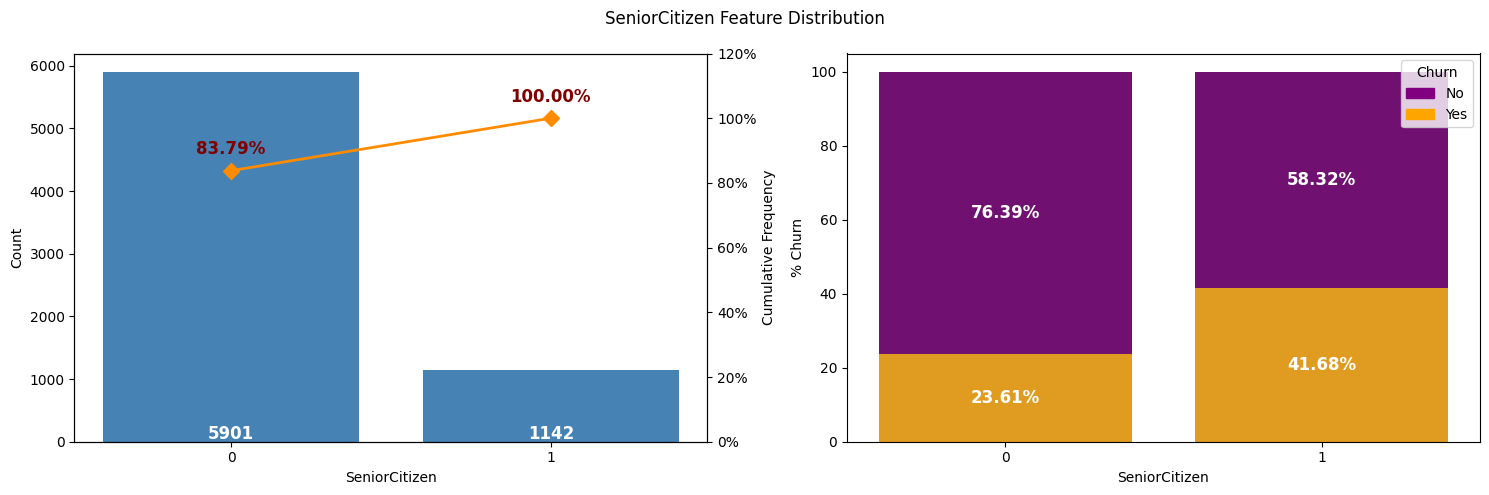

In [10]:
plot_categorical_feature(feature="SeniorCitizen", data=customer_churn)

As said previsouly, this is a highly unbalanced feature, as category `0` represents hoghly 84% of the feature data

### Numerical Features Plot Function

Now to visualize the numerical features distribution, we'll define a function to display the show the histogram and box plot of the features, highlighting the proportion of customers that churned in each bin/box.

In [11]:
def plot_numerical_feature(feature, data):
    _, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 6))
    sns.histplot(x=feature, data=data, hue="Churn", ax=ax1, multiple="stack")
    sns.boxplot(x="Churn", y=feature, data=data, ax=ax2)
    plt.suptitle(f"{feature} Feature Distribution")

### tenure

`tenure` denotes the amount of months that someone was a company customer.

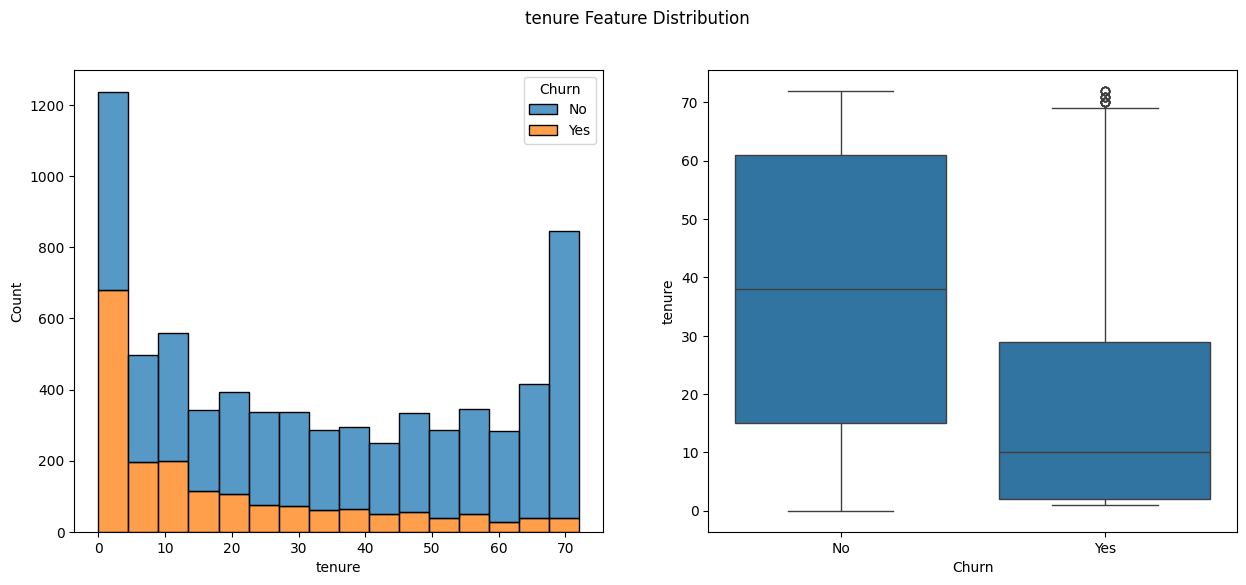

In [12]:
plot_numerical_feature("tenure", data=customer_churn)

- A lot of customers have stayed with the company for only 5 months.
- A lot of customers have stayed with the company for at least 70 months as well.
- The longer the period of months the customers stayed with the company, the less is the proportion of customers that churned. This indicates that long term customers have low probability of leaving the company.
- We also see that the few customers that stayed for more than 70 months and still churned are considered as outliers in the box plot.

### MonthlyCharges

`MonthlyCharges` is the monthly amount paid by a customer. The description doesn't state clearly if it's an average amount or the amount paid in the last measured month for the customer.

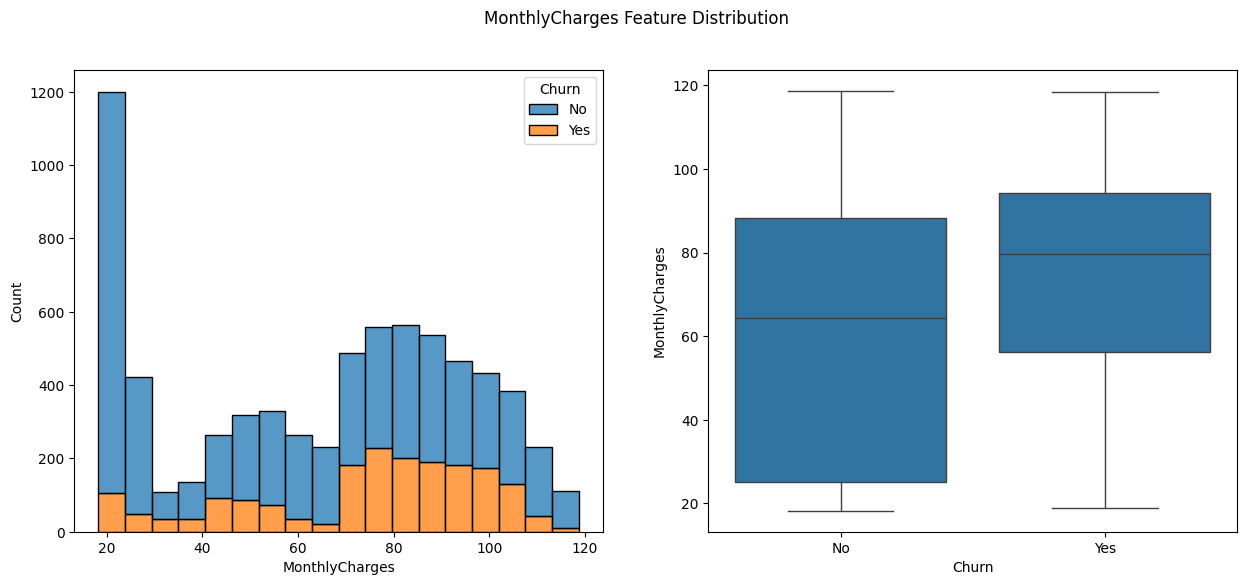

In [13]:
plot_numerical_feature("MonthlyCharges", data=customer_churn)

- Almost 1200 customers were charged 20 monetary units, which less than 100 of those clients have churned.
- The average monthly charged for customers that haven't churned is of 65 monetary units. Also, we have a concentration of those customers that paid between approximately 65 to 90 monetary units.
- The average monthly charged for customers that churned is around 80 monetary units, with concetrantion of customers that paid around 85 to 95 monetary units.
- Besides that, we cannot make much assumptions about the correlation of the feature with Churn.

### TotalCharges

`TotalCharges` is total amount paid by a customer during the he was a company's client. As we saw previously, this feature is indeed numeric, that falsely was recognized as `object` type due to the ampty string character in a few entries. We'll fix this now by using the Pandas's `to_numeric` function. The `errors` parameter tells the function that the values that cannot be casted to numerical types will be considered as missing values.

In [14]:
total_charges = pd.to_numeric(customer_churn.TotalCharges, errors="coerce")
total_charges.isna().sum()

11

As expected, 11 values are missing.

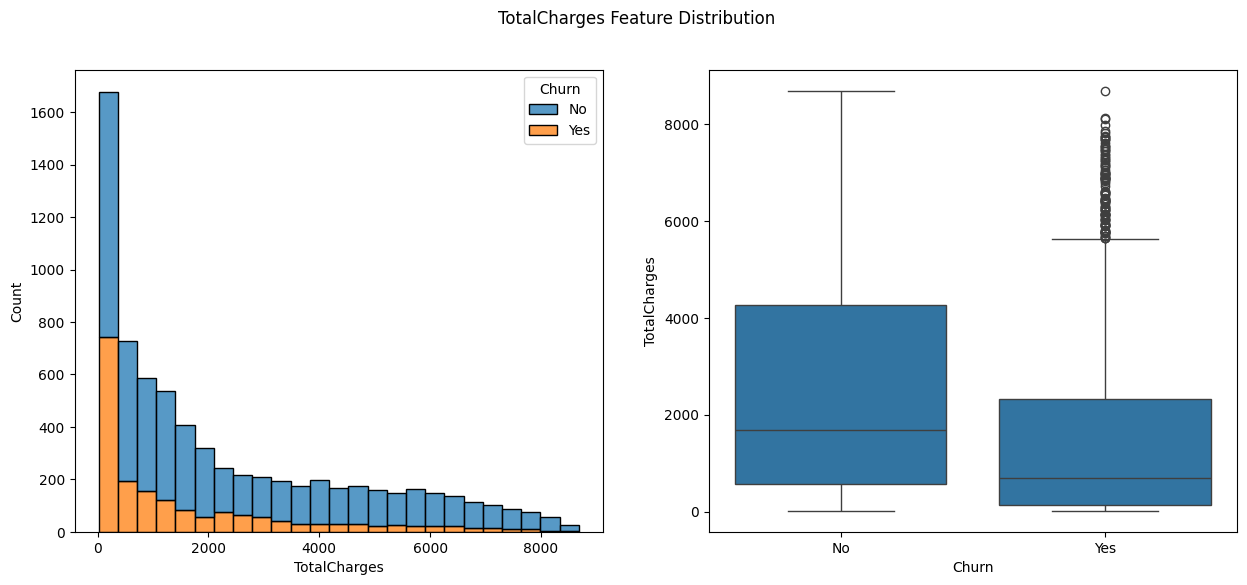

In [15]:
temp_df = pd.DataFrame({"TotalCharges": total_charges, "Churn": customer_churn.Churn})
plot_numerical_feature(feature="TotalCharges", data=temp_df)

- There are almost 1600 customers that paid a total between 0.0 and 35 monetary units. We can also identify that the number of customers decreases almost exponentialy as the amount range increases. This indicates that customers tends to opt to pay less for the company's services.
- We can see that customers that churned in the almost same way: 800 paid between 0 and 35 monetary units, and the customers counts decreases as the amount range increases. This indicates that, althought less numerous, clients that pay more tends to stay with the company.
- The average total payed by customers that haven't churned is around 1900 to 2000 monetary units, with a high number of customers that payed between 0 and 200 monetary units.
- The average total payed by customers that churned is around 1400 monetary units, with a concentration of customers that payed between 0 and 1400 monetary units.
- We can also see some outliers that payed more than around 5800 monetary units.

## Non-Numerical Features Distribution

Now we'll investigate the non-numerical features (`object` types).

### gender

`gender` tells if the customer is male or female.

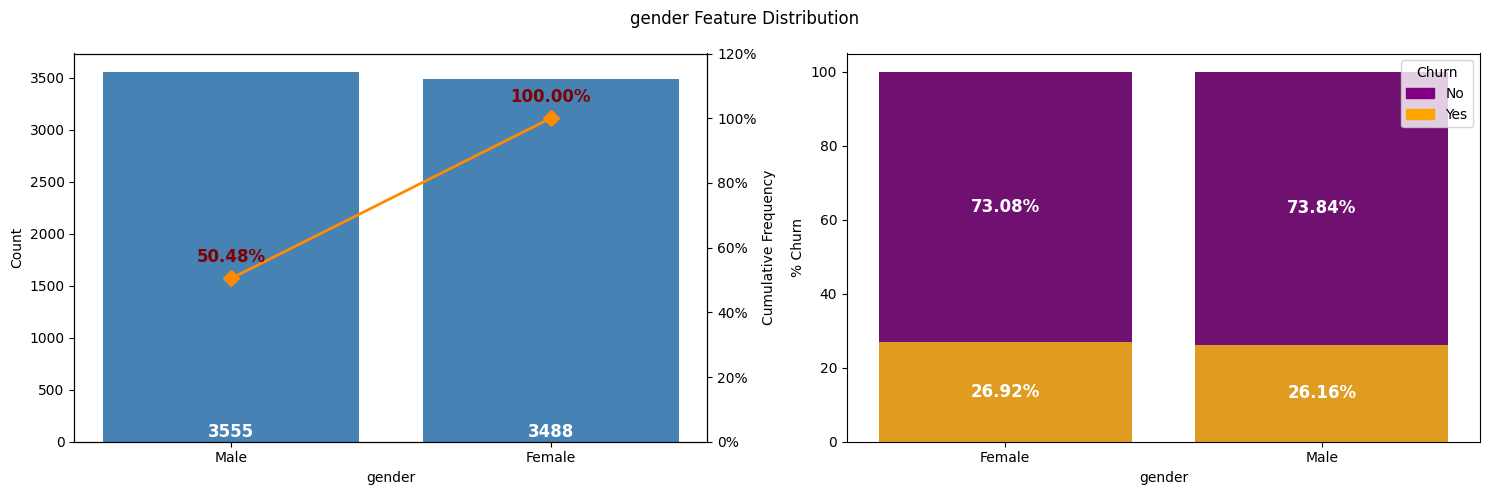

In [16]:
plot_categorical_feature(feature="gender", data=customer_churn)

- The two categories have hoghly the same proportions.
- The proportions of churned customers are also the same for each category. Certainly, this feature won't help directly in our future classification strategy.

### Partner

`Partner` indicates if the customer has a partner.

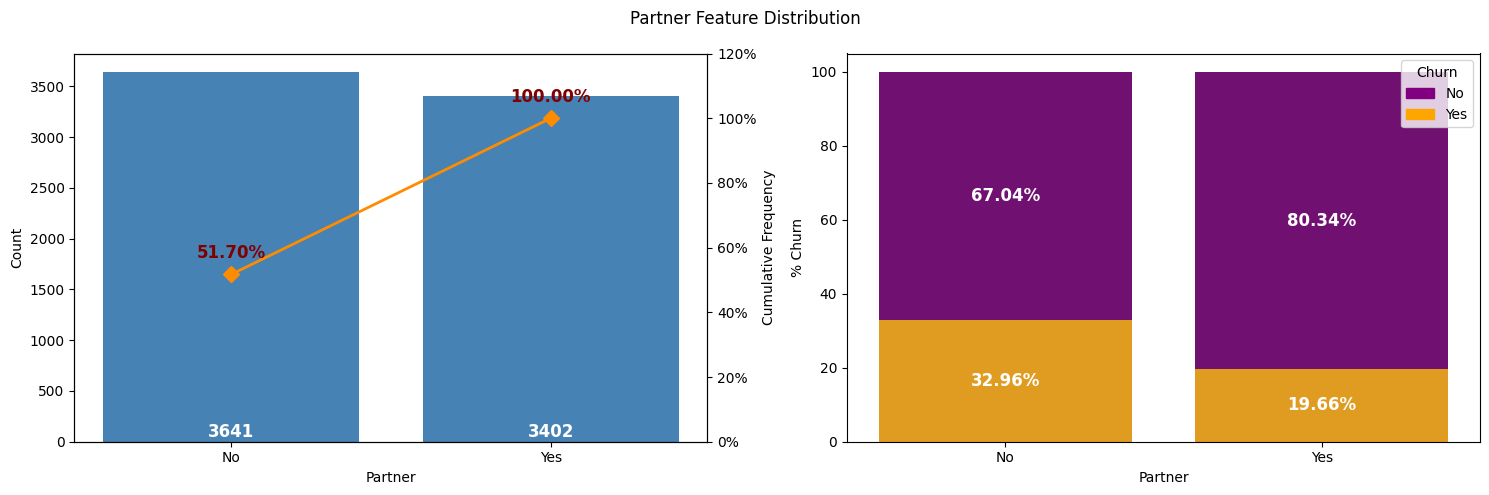

In [17]:
plot_categorical_feature(feature="Partner", data=customer_churn)

- These two categories are also pretty balanced.
- The proportion of churned customers that doesn't have partners is almost the double of those that have.

### Dependents

`Dependents` indicates if a customer has any dependant.

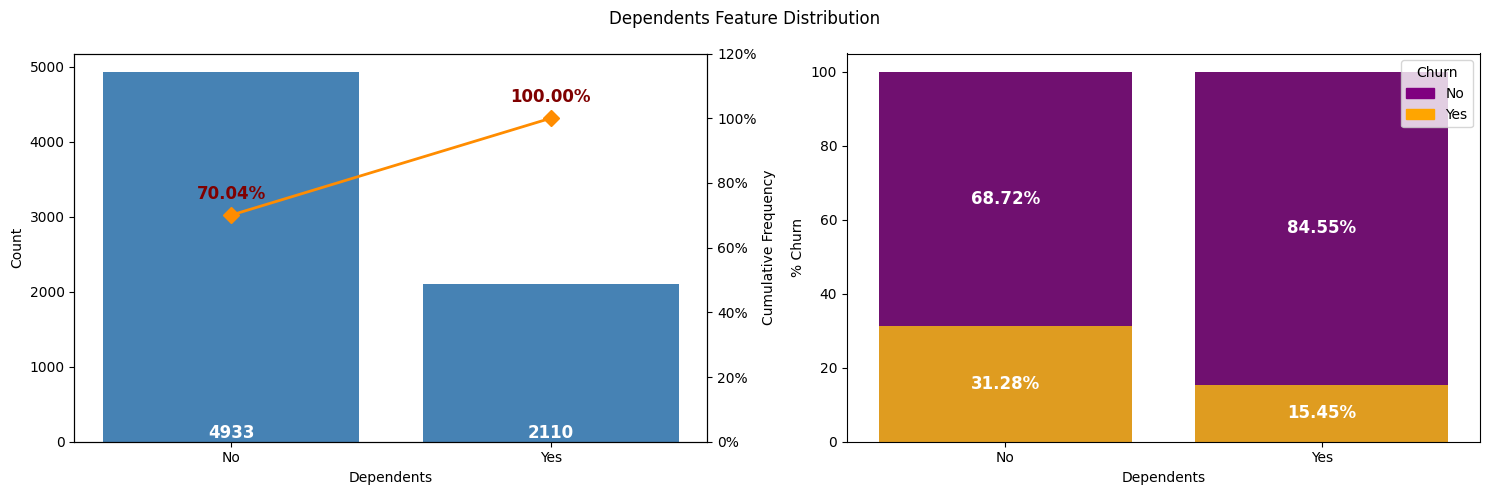

In [18]:
plot_categorical_feature(feature="Dependents", data=customer_churn)

- 70% of the customers doesn't have dependents.
- The proportion of churned customers that doesn't have dependents is almost the double of those that have.

### PhoneService

`PhoneService` tells if a customer has at least one phon line.

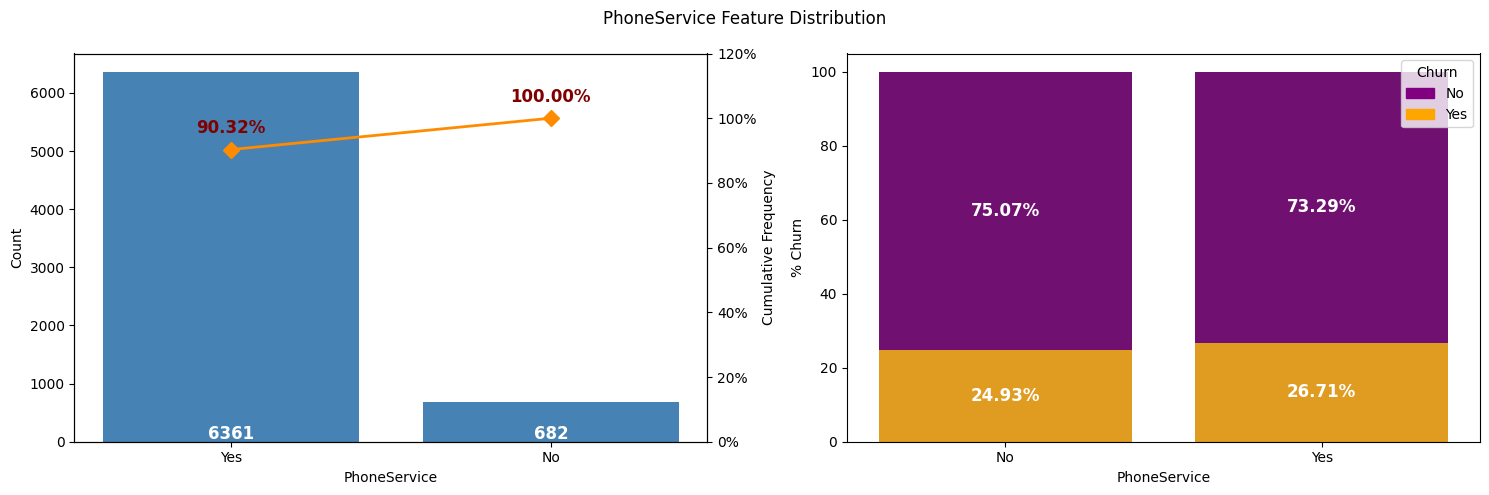

In [19]:
plot_categorical_feature(feature="PhoneService", data=customer_churn)

- In this feature, we more than 90% of the customers has a phone line.
- The proportion of churned customers in both categories are almost te same.
- Probably, this feature won't help that much in our future classification estrategy, as it doesn't give us any sufficient information.

### MultipleLines

`multipleLines` identifies which customers has 0 or more than one phone lines.

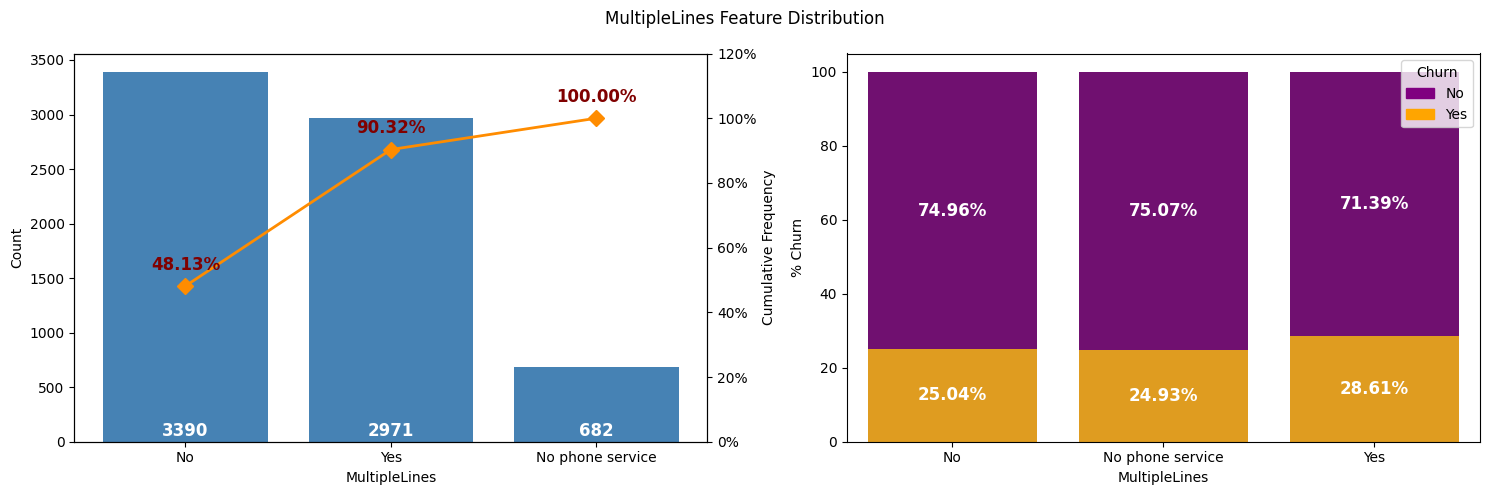

In [20]:
plot_categorical_feature(feature="MultipleLines", data=customer_churn)

- As we saw before, less than 10% of customers doesn't have a phone service.
- 48% of customers has only one phone line.
- 42% of customers have opted for more than one line.
- All categories have the same proportion of churned customer. So this features may not be usefull for classfication.

### InternetSevice

`InternetService` tells if a customer pays for an internet service

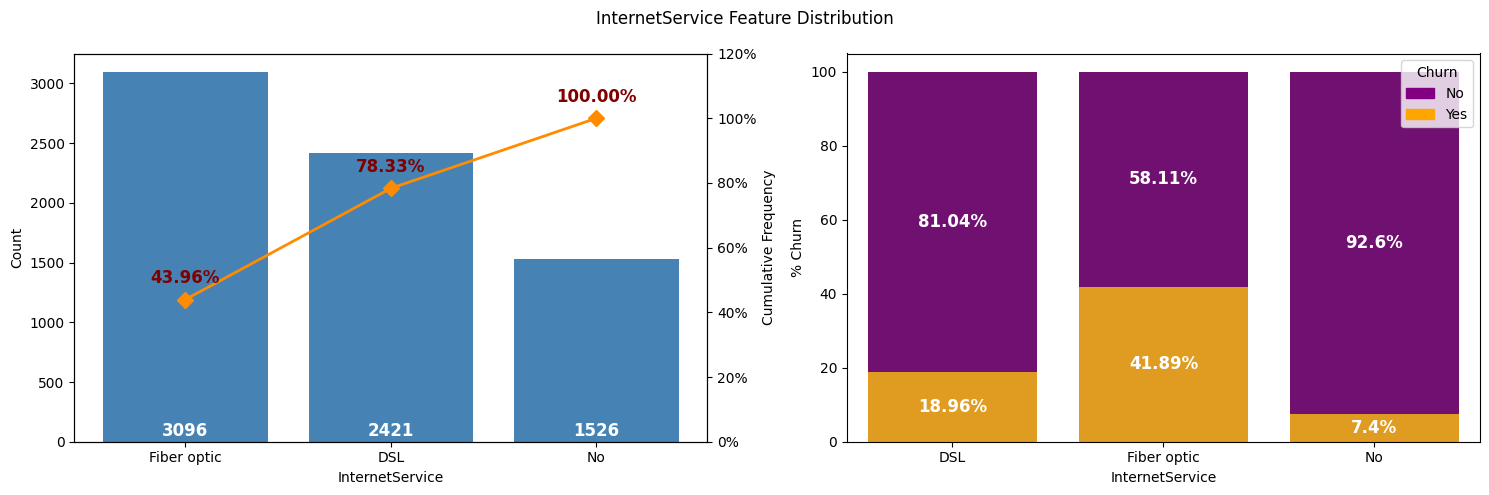

In [21]:
plot_categorical_feature(feature="InternetService", data=customer_churn)

- 43% of customer has opted for a Fiver Optic internet service, the most popular internet service.
- 34% has opted for the older DSL internet service provider.
- Almost 22% of customer doesn't have an internet service at all.
- Users of Fiber Optic internet service have a propability of 42% of leave the company, while user of DSL service have almost half of this proportion.
- For those that doesn't have an internet service, only 7,4% churned.

### OnlineSecurity

`OnlineSecurity` identifies if the online security is included in the customer's service plan.

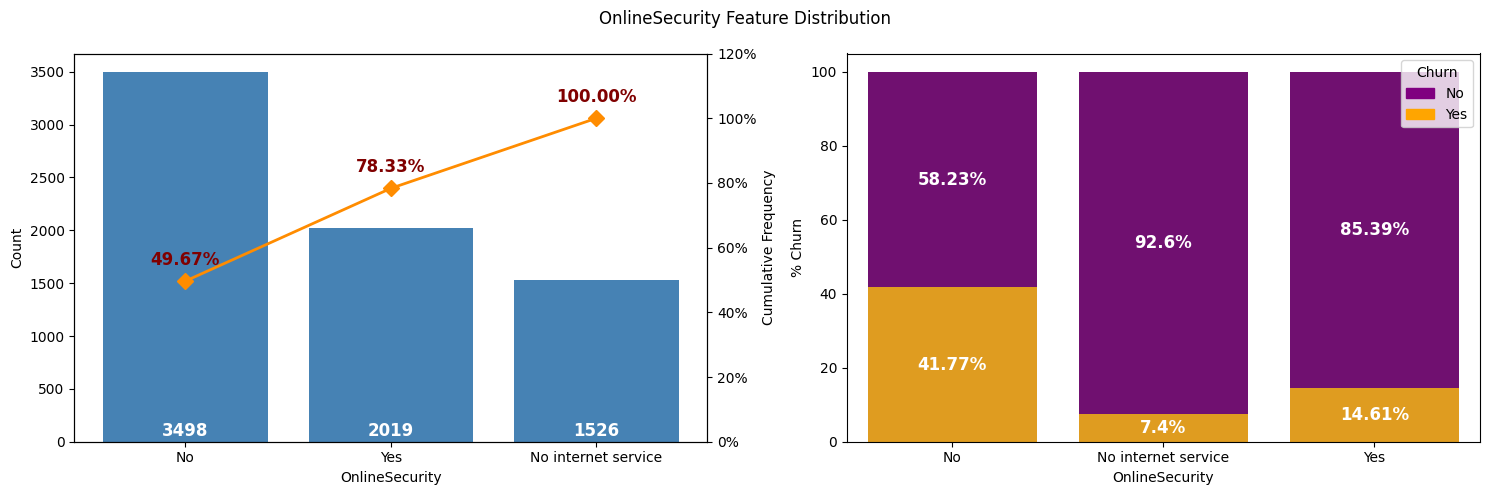

In [22]:
plot_categorical_feature(feature="OnlineSecurity", data=customer_churn)

- First of all, it's important to note that 22% of the customers doesn't have signed for the internet service provided by the company, relating to the analysis of the `InternetService` feature that we made previsously.
- Half of the customers opted to not have the online security. 42% of them have churned.
- For those that have the service, almost 14.61% of them have churned. This information may not be that relevant, as this proportion, althought the double, is still very close to the proportion of churned customers that didin't have the internet service, indicating that customers with internet are not sensible to this service.
- Customers that haven't signed for the online security, we have almost the same proportion of churn. This information may have some prediction power.

### OnlineBackup

`OnlineBackup` indicates if a customer have the online backup service.

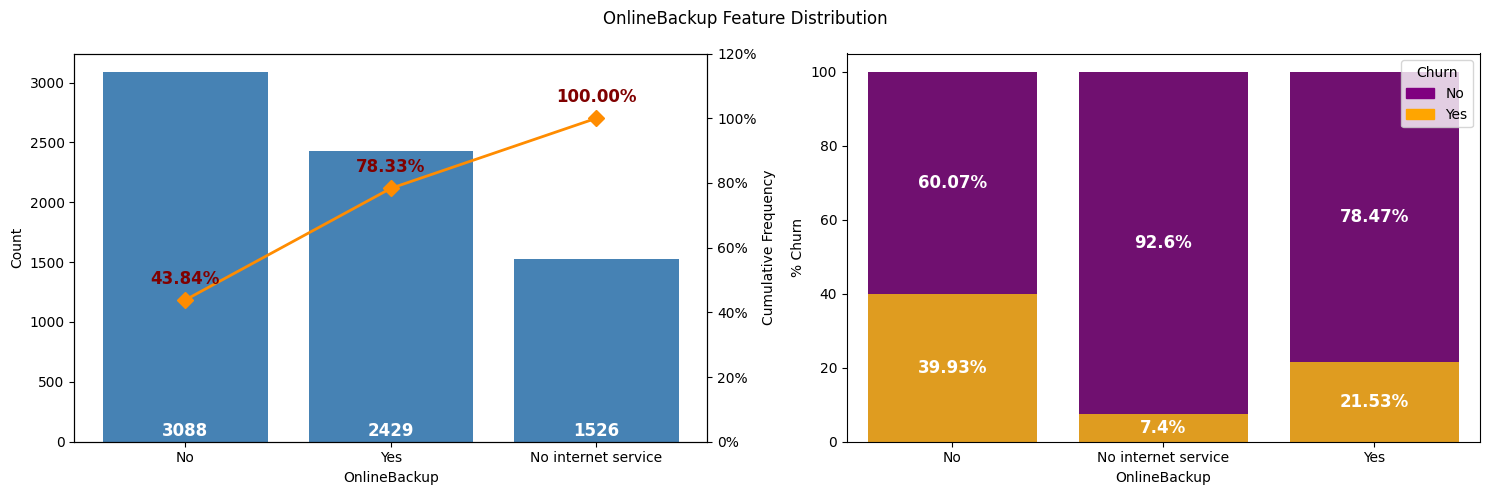

In [23]:
plot_categorical_feature(feature="OnlineBackup", data=customer_churn)

- Once again, this service doesn't that much of adderence between customers, as 44% of them opted to not sign for it.
- The proportion of churned customers between those that have the service also is not that relevant, being slightly higher than that of the `OnlineSecurity` feature.
- The churn rate between those that doesn't have the service i 40%, indicating some predition power.

### DeviceProtection

`DeviceProtection` indicates if a customer have the device protection service.

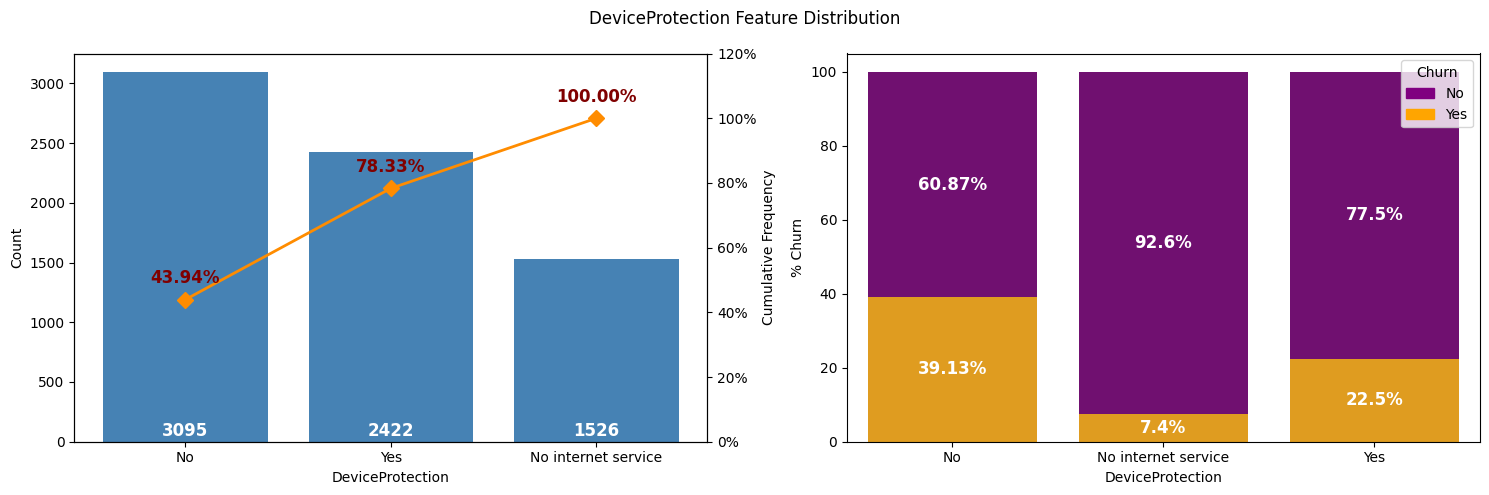

In [24]:
plot_categorical_feature(feature="DeviceProtection", data=customer_churn)

This feature distribution follows pretty much the same of the `OnlineBackup`, with very similar churn proportions in each category. These services mey be related, like offered in the same package. All comments for the `OnlineBackup` are valid with this feature.

### TechSupport

`TechSupport` indicates if a customer has the tech support service.

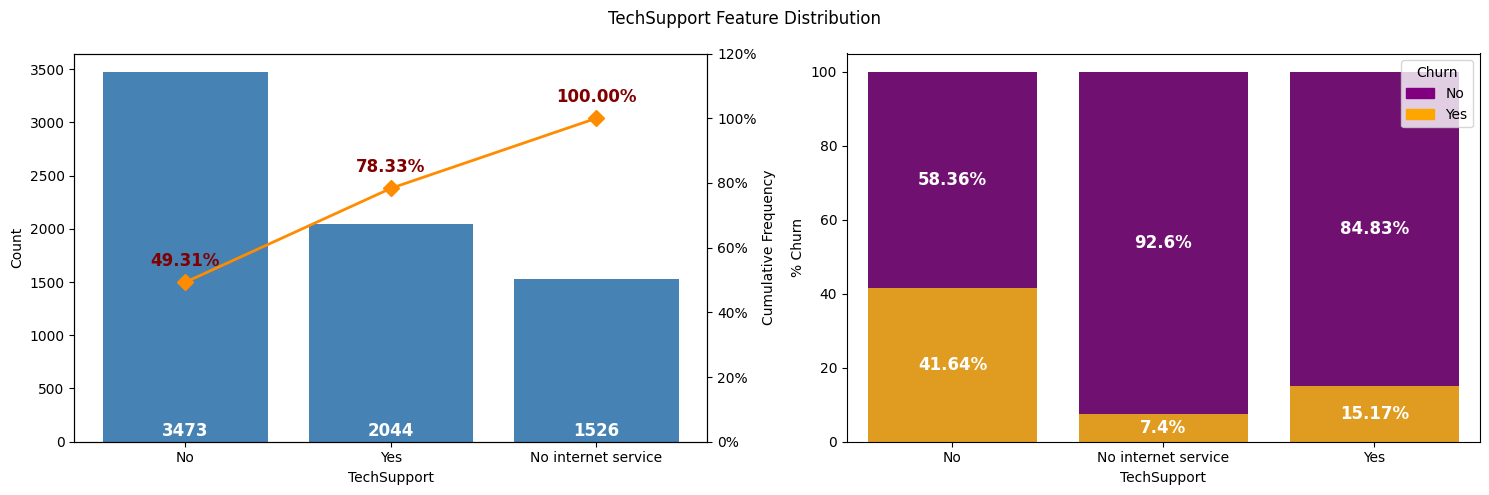

In [25]:
plot_categorical_feature(feature="TechSupport", data=customer_churn)

This feature also has a similar distribution and churn proportions as the last 3 features. The comments for those features are still valid.

### StreamingTV

`StreamingTV` indicates if a customer has the streaming TV service.

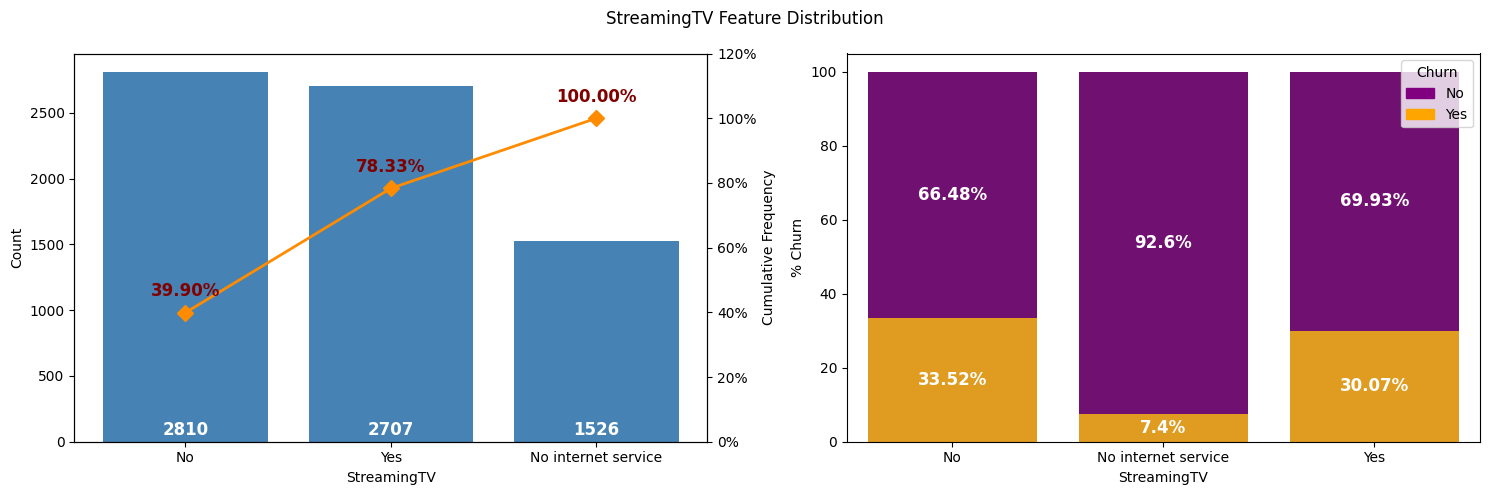

In [26]:
plot_categorical_feature(feature="StreamingTV", data=customer_churn)

- We can see that, for those that have the internet service, the number of customers that doesn't have the streaming TV is only slighly higher than the number of those that have.
- Also, the ratio of churned customers in each category is almost the same, with a slightly higher rate for customers that doesn't have the service.
- The likeliness of the churn ration in the two categories doesn't bring any relevant information, so the prediction power of this feature is low.

### Contract

`Contract` indicates the customer contract type.

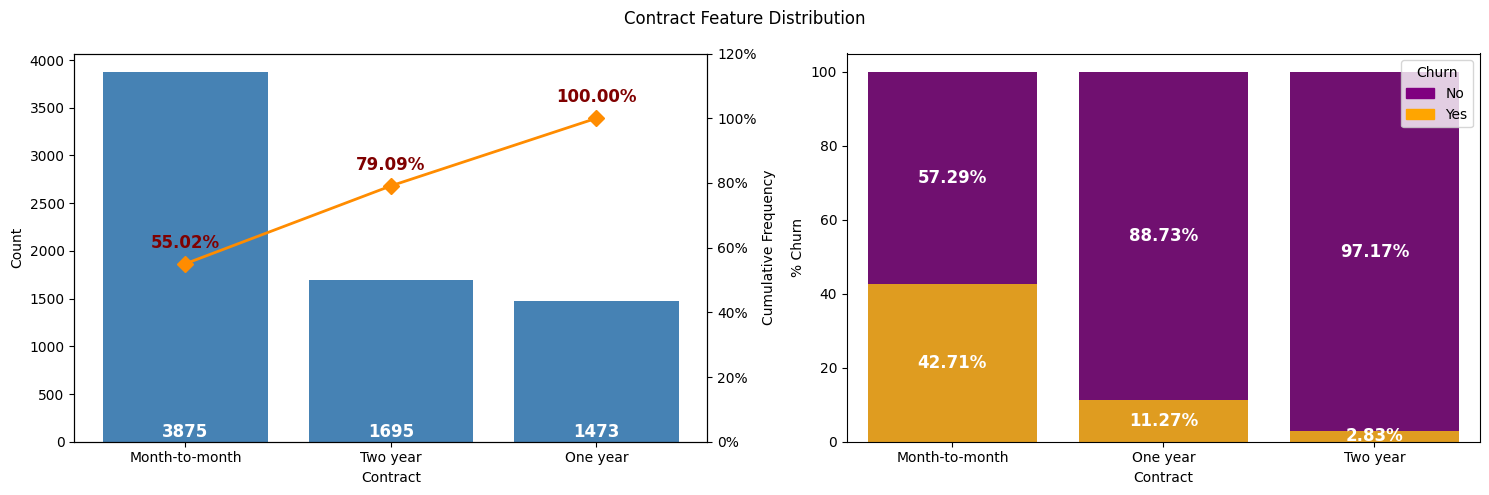

In [27]:
plot_categorical_feature(feature="Contract", data=customer_churn)

- 55% of customers opted for monthly contracts. This makes sense, as the majority of users don't want to compromise their budged.
- One year and two year contract types have similar customer proportions, with 24,07% and 20,91% of customers respectively.
- The churn ratio in each category is different from each other, so this feature has some predicting power.
- Customers with monthly contract have the highest probability of leaving the company as the churn ratio of customers in this category is of 42,71%.
- Customers with longer contract periods have a lower propability of leaving the company. For customers with two year contract, only 2,83% have left.

### PaperlessBilling

`PaperlessBilling` indicates if a customer opted for a paperless billing or not.

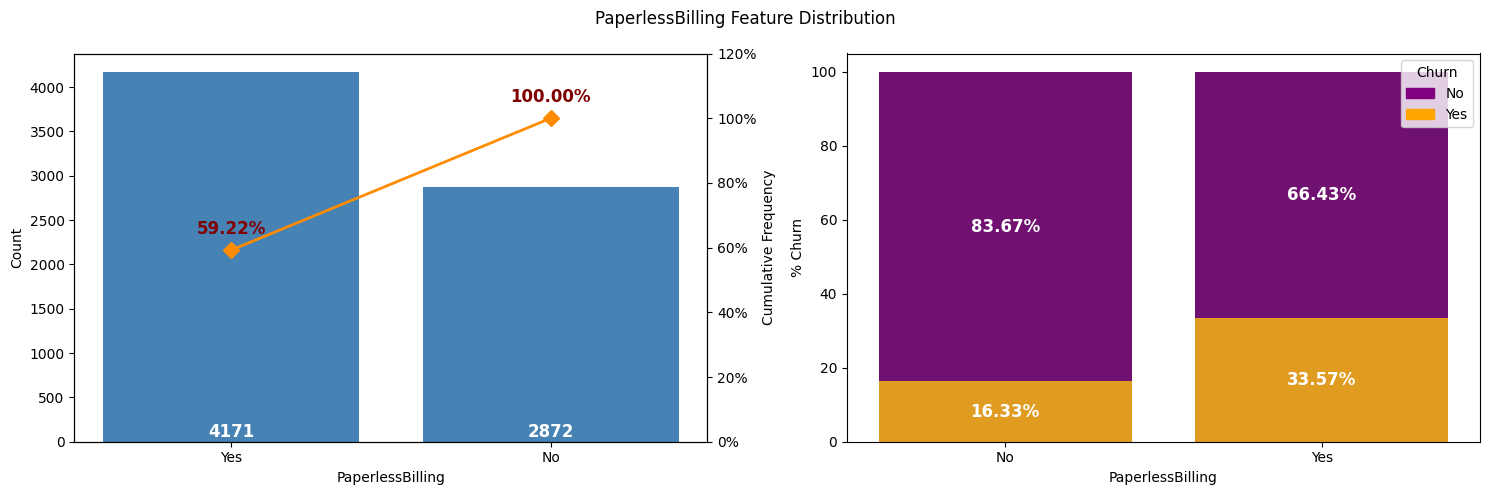

In [28]:
plot_categorical_feature(feature="PaperlessBilling", data=customer_churn)

- Almost 60% of customers opted for the paperless billing.
- Customers with paperless billing have almost the double of the chance of churning thant those that don't, with 33.57% and 16.33% of customers that churned respectively.

### PaymentMethod

`PaymentMethod` indicates the payment method chosen by the customer.

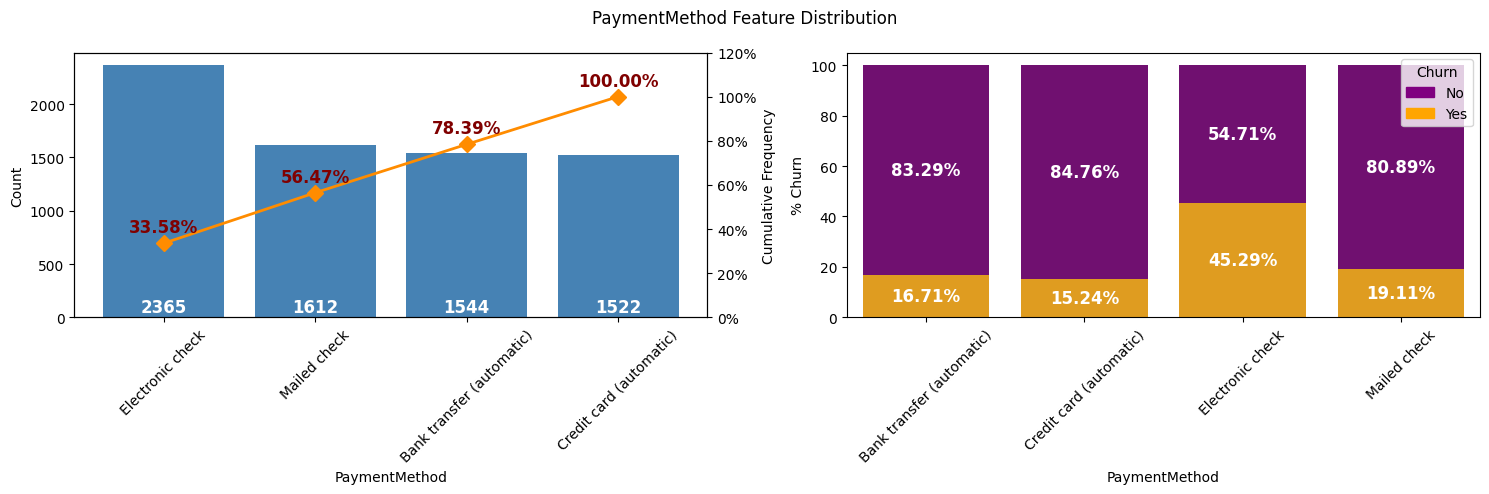

In [29]:
plot_categorical_feature(feature="PaymentMethod", data=customer_churn, rotate_xticks=True)

- `Electronic check`has the higher customers number, with 33.58% of the total
- `Electronic check` also has the higher churn rate, with 45,29% of customers in this category.
- `mailed check`, `Bank transferm (automatic)` and `Credit card (automatic)` have hoghly the same customers share, with 22,89%, 21,92% and 21,61% respectively.
- Interestingly, `mailed check`, `Bank transferm (automatic)` and `Credit card (automatic)` also have similar churn ratios, with 19,11%, 16,71% and 15,24% respectively.

## Target Feature Distribution

Now, lets take a look at the general distribution of the target feature. `Churn` indicates if a customer has opted to terminate it's service contract with the company.

Locagically, the value `Yes` indicates that the customers has opted to leave the company, and `No` means the contrary. So this problem is a **binary classification problem**.

<Figure size 1500x500 with 0 Axes>

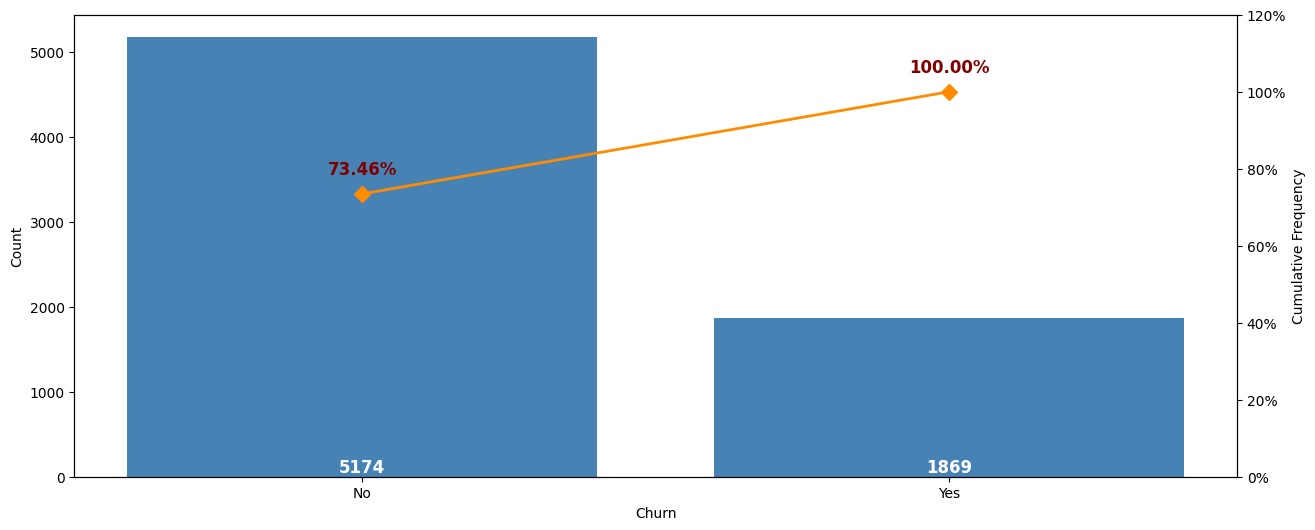

In [30]:
plt.figure(figsize=(15, 5))
pareto_plot("Churn", customer_churn)

There are 73.46% of customers that haven't churned in the dataset. This is almost 1/4 of the data, indicating that we have a highly **unbalanced** dataset, which can directly affect our prediction strategy as the `No` class will be priorized over the `Yes` class. This knowledge is crucial when chosing the right **evaluation metric** for the models that we'll build later.

Also, when many ways o this kind of problem. This is not the subject of this project, but I'll certainly expand the concepts of this notebook in a future project, and I'll eventually show to deal with this matter.

## Feature Correlations

Let's take a look in the correlations between the features that we have analyzed. But first, lets replace the `TotalCharges` feature for their numerica values.

In [31]:
customer_churn["TotalCharges"] = total_charges

### Feature Correlations Plot Function

To visualize the features correlations lets build their **correlation matrix**.

A **correlation matrix** of $ n $ features $ X_1, X_2, \cdots, X_3 $ is the $ n \times n $ matrix $ C $, whose each entry $ c_{ij} $ is the correlation coefficient between features $ X_i $ and $ X_j $.

To compute this matrix, we'l use the Pandas DataFrame's [corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) method. The standard correlation type used by this method is the [Pearson Correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), given by:

$$
c_{ij} = corr(X_i, X_j) = \frac{cov(X_i, X_j)}{\sigma_{X_i}\sigma_{X_j}}, \text{ if } \sigma_{X_i}\sigma_{X_j} \gt 0
$$

where:
- $ cov(X_i, X_j) $ is the [covariance](https://en.wikipedia.org/wiki/Covariance) between features $ X_i $ and $ X_j $;
- $ \sigma_{X_i} $ is the [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) of the feature $ X_i $

The correlation coefficient value is in range $ [-1, 1] $: a coefficient closer to 1 means a **higher direct** relationship between two features (i.e: the higher is $ X_i $, higher will be $ X_j $), while a coefficient closer to -1 means a **higher indirect** relationship between features (i.e: the higher is $ X_i $, lower will be $ X_j $ and vise-versa).

Coefficients closer to 0 means that two features have low relationship.

In [32]:
def plot_correlations(df, figsize=(12.5, 6.5)):
    # we won't modify the original dataframe.
    df_copy = df.copy().dropna()
    
    # the corr() method accepts numerical features only. So first we change the categories values of each feature for a number representation.
    for feature in df.columns:
        if pd.api.types.is_object_dtype(df[feature]):
            df_copy[feature] = pd.Categorical(df_copy[feature]).codes
    
    corr = df_copy.corr()
    
    # plot a heatmap of the correlation matrix.
    _, (ax1, ax2) = plt.subplots(ncols=2, figsize=figsize, gridspec_kw={"width_ratios": [2, 1]})
    corr_features = corr.drop("Churn", axis="rows").drop("Churn", axis="columns")
    mask = np.triu(np.ones_like(corr_features, dtype=bool))
    sns.heatmap(corr.drop("Churn", axis="rows").drop("Churn", axis="columns"), mask=mask, ax=ax1)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, ha="right")
    ax1.set_title("Features Correlations")
    
    # display a barplot for the features correlations with the target "Churn" feature.
    churn_corr = corr.Churn.sort_values().drop("Churn")
    sns.barplot(x=churn_corr.values, y=churn_corr.index, ax=ax2)
    ax2.set_title("Features Correlations with Churn")
    
    plt.tight_layout()

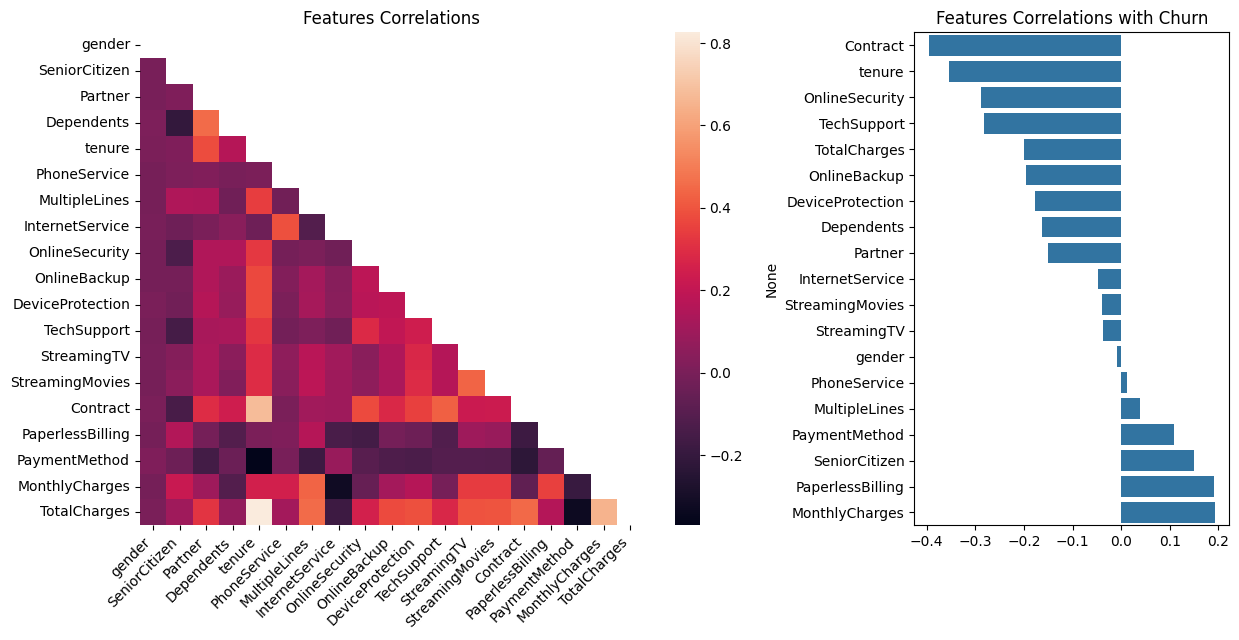

In [33]:
plot_correlations(customer_churn.drop("customerID", axis="columns"))

### Features Correlations

The first plot shows the features correlation matrix. As the correlation matrix is a symmetric matrix, for the sake o better visualization, the upper triangle of the matrix was omitted. Cells with brighter colors represents high direct feature correlations, while cells with darker colors represents high inverse features correlations.

We can see that some features indeed have some good correlations:
- `Contract` and `tenure` have a direct correlation. This makes sense as the contract type will dictate how long will be period the customer will stay with the company.
- `MonthlyCharges` has some direct correlation with some services. Obviously, the monhtly charges depend on the number of services the customer is signed in.
- Features representing services (e.g, like `StreamingTV`, `TechSupport` and `DeviceProtection`) have some positive correlation with each other, confirming that they may be offered together as a package.
- `Contract` also has positive correlations with some service features. Long-term contracts may have more cost-benefit if the customer sign for addition services.
- `MonhtlyCharges` also has correlation with `TotalCharges`.
- `TotalCharges` also has a good correlation with `tenure`. Obvisously, the longer a customer stays, the total charged for him is higher.

Also there are some features with strange inverse correlations, like:
- `Dependents` and `SeniorCitizen`.
- `tenure` and `PaymentMethod`.
- `InternetService` and `MonthlyCharges`.

These relationships would need a more in-depth investigation in a real world scenario.

### Target Feature Correlations

The plot on the right shows the features correlations with `Churn` exclusively. it may be a bit tricky to understand if we don't relate the `the more the number of services, the more will be the monthly charges, so certainly those services have some appealChurn` values with the coefficients themselves, so let's clarify.
- `Yes` is the positive class. So if customers are likely to churn if a feature has higher values, then the correlation is direct and positive.
- On the other hand, if few customers leave if a feature has higher values, then the correlation is inverse and negative.

With these statements, we can draw the following assumptions:
- `gender`, `PhoneService` and `TotalCharges` are indeed loosely related to `Churn`, and they won't help that much in the classification strategies that we'll design later.
- `PaperlessBilling` and `MonthlyCharges` have both positive and similar correlation with `Churn`. `MonhtlyCharges` is understandable: the higher is the monthly charges, the less appealing will be a long-term relationship will be between customers and the company. I have no clue about the `PaperlessBilling`.
- `Contract` has the higher indirect relationship with `Churn`, and this is understandable too: the longer the contract period, more the customer will stay, simple as that.
- `tenure` is also understandable: long-term customers tends to stay.
- Some services may be very appealing to customers. `OnlineSecurity` and `TechSupport`, as we saw earlier, have a great prediction power in determining which customers won't churn.

## Binomial analysis

Analyzing those correlations we can note that some of the features that are relatively correlated also have a good correlation with `Churn`. Now, we'll check if we vizually identify any pattern by checking their plots.

### MonthlyCharges & TotalCharges

We can see that between `TotalCharges` and `MontlhyCharges` themselves have some correlations, like some clusters at some specific monthly charges ranges and a linear correlation between the maximuns of those clusters.

The main take away of this plot is that churned customers concentrate mainly at the bottom right of the plot. We can assume that customers that are more monthly charged have a high probability of staying for a lower period of time with the company, as their total charges tends to be low.

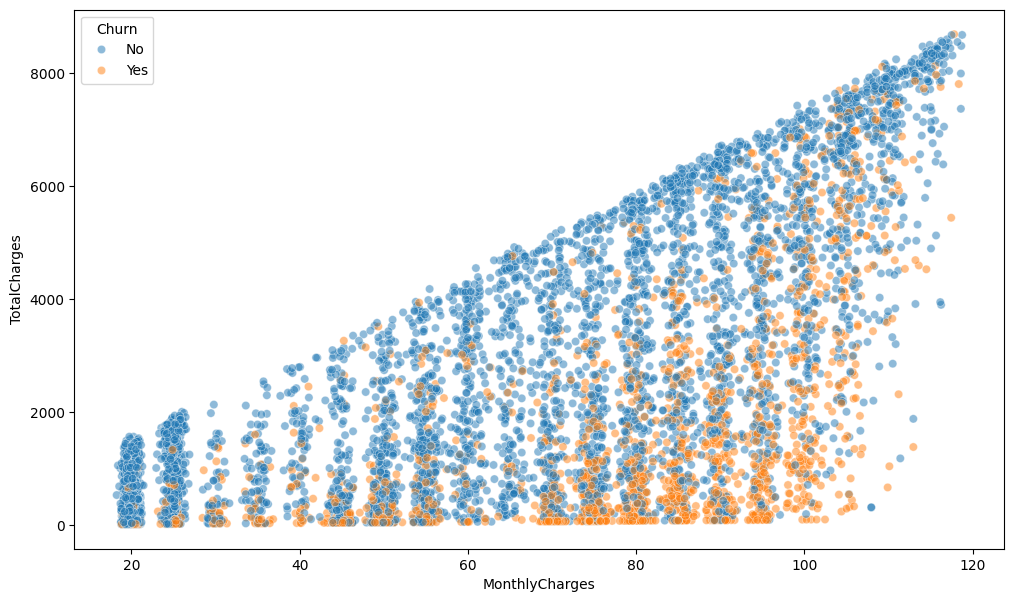

In [34]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x="MonthlyCharges", y="TotalCharges", hue="Churn", alpha=0.5, data=customer_churn);

### TotalCharges & tenure

Here we can see that mainly at the first months, customers whose charges were too high had a high probability of leaving the company services, supporting our late assumption. More than that, we can se that the longer a customer stays, the lower is the probability of churn.

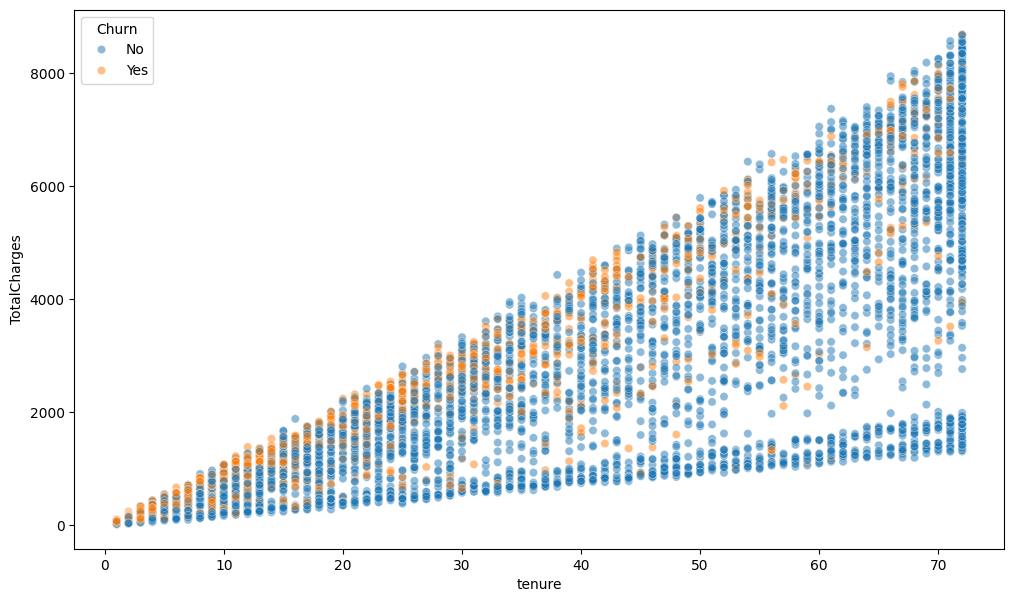

In [35]:
plt.figure(figsize=(12, 7))
sns.scatterplot(y="TotalCharges", x="tenure", hue="Churn", alpha=0.5, data=customer_churn);

### tenure & Contract

Finally, these plots consolidate our earlier assumptions:
- Customers with monthly contracts tends to churn, mainly at the first months. These customers may just want to test the company's services and probably, didn't liked what was offered our found more cost-benefit providers.
- Customers with anual contracts are more loyal, and probably will stay for extended periods of time, with multiple contract renews.
- Customers with two year contracts will certanily stay for very long periods of times. Prabably, they'll only leave the company if something abnormal happens, like financial problems or changes in the service contract.

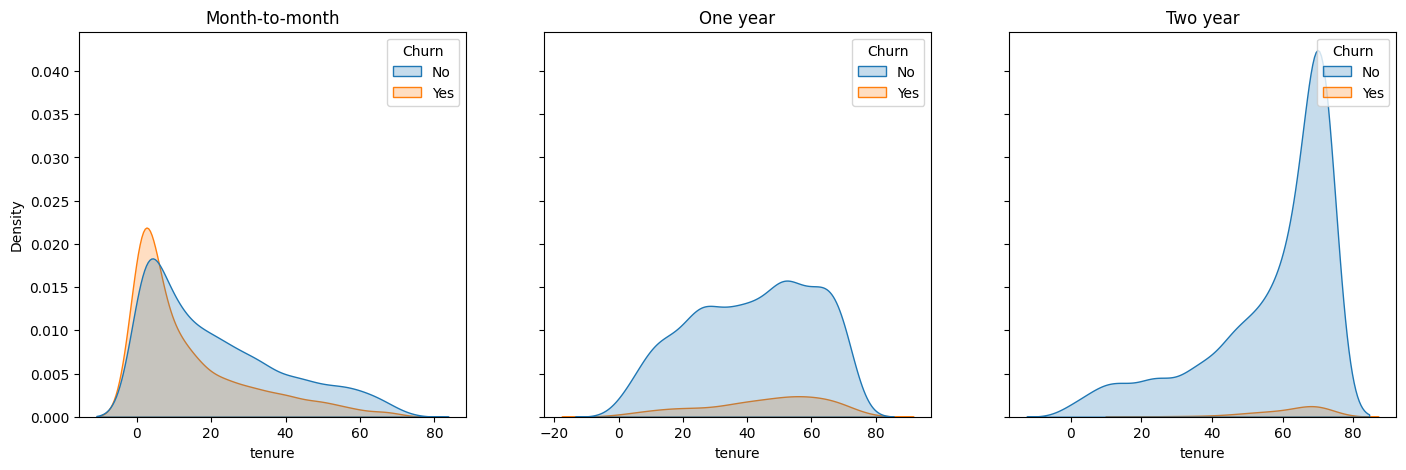

In [36]:
_, axs = plt.subplots(ncols=3, figsize=(17, 5), sharey=True)

for ax, contracty_type in zip(axs, customer_churn.Contract.unique()):
    sns.kdeplot(x="tenure", hue="Churn", shade=True, data=customer_churn[customer_churn.Contract == contracty_type], ax=ax)
    ax.set_title(contracty_type)

# Feature Engineering

Before we start to make new features, there are some issues with the existing features that we need to attend.

#### Drop customerID field

First of all, the `customerID` won't serve us any good: it's only a randomly create string, unique for each customer. It doesn't have anything to do with the customers behavior or `Churn` ratio. Thus, we'll just drop it.

In [37]:
customer_churn.drop("customerID", axis="columns", inplace=True)

#### Drop columns with missing values

In the beggining of this project we mentioned that, right after loading the data, it seemed that there weren't missing values in the dataset. But after a quick investigation if the features types, we realized that `TotalCharges` type was wrongly infered as `object`, due to the presente of empty string characters. We proceeded in coverting the feature's values to numeric type by using the Pandas' function `to_numeric`, with parameter `errors` set to `coerce`. This in turn, interpreted the empty strings as missing values, as expected.

In [38]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Now we have 11 missing entries in `TotalCharges`. We could try to impute those values from the dataset itself, but due to the low number of those occurences, I decided to just drop their respective rows. Besides, we don't have a clear way of inferring the imputing values.

In [39]:
customer_churn.dropna(inplace=True)
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

As we don't need the original data of the dropped columns, this operations was executed **inplace**: the modification was made in the dataframe itself instead of returning a copy. Now we have 7032 entries in our dataset, instead of 7042.

## Create New Features

Now that we have investigated each feature and their correlations with the target feature, it's time to laverage some of those correlations to create new features that (hopefully) can better explain customers behavior.

**Note:** We won't explore neither all correlations and all new possible features. The main goal here is to present a basic complete Data Science project. I'll create a more in-depth project for feature exploration and engineering in the future.

#### Number of Services

One the assumptions that we realized during the EDA is that some features that represents offered services seems to be related and impact direclty in the amounts charged to each customer. We also theorized that some of those services may be offered together with each other, as service packages. This can be very appealing for some customers, as they can get multiple services of interest  at lower prices.

This feature represents the number of services each customer has in their service plans. It isn't expected to have a great prediction power. Intead it will be more like a support feature, that will be used to create other features that can better explain the relationship between costs and customer churn.

The following features will be considered as services:
- `Phone Service`
- `InternetService`
- `MultipleLines`
- `OnlineSecurity`
- `OnlineBackup`
- `DeviceProtection`
- `TechSupport`
- `StreamingTV`
- `StreamingMovies`

For all of those features excpet for `InternetService`, we just need to check if their values are set to `Yes` to identify if the customer has this service. For `InternetService`, as it's possible values are a bit different from the other features, we need to check if it's value is diffenrent from `No`.

With all checks done, we just need to count the services.

#### Total Average Charges per Service

This feature hoghly represents the average total payed by a customer with relation to the total number of services it has. The main goal here is to get a simple representation of the cost-benefit of services throughout the entire history of the customer relationship with the comapany and it's relationship with the churn ratio.

The total average charges per service `TotalAvgChargesPerService` of a customer $ C $ is given by:

$$
TotalAvgChargesPerService_C = \frac{TotalCharges_C}{NumberOfServices_C}
$$

#### Monthly Average Charges per Service

This feature highly represents the monthly average payed by a customer with relation  to the total number of services it has. It tryies to estimate the individual costs value of each service for a specific customer and if this value can impact in the customer's churn probability.

The monthly average chages per service `MonthlyAvgChargesPerService` of a customer C is given by:

$$
MonthlyAvgChargesPerService_C = \frac{MonthlyCharges_C}{NumberOfServices_C}
$$

## Create the transform for computation of new features

We'll create a Scikit-Learn like **transform** component to add the features that we defined. I've chosen this strategy, instead of direclty modifi our original data, mainly because of the practical benefits offered by the transform component, like:
- **Reduction of code redundancy:** without the transform, we would certanly need to explicitly apply the same operations to the train and test sets that will define in a moment. Of course, we could also a customer function for this, and this leads us to the second point.
- **Integration with the Scikit-Learn data processing pipeline standard:** when using estimators-like components, we can integrate the data wrangling, processing, feature engineering and model training in one single pipeline component, with a simple and clean API. We'll see this in a moment too.

In [40]:
class NewFeaturesAdder(BaseEstimator, TransformerMixin):
    SERVICES_ = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy["NumberOfServices"] = (X_copy[self.SERVICES_] == "Yes").values.astype(int).sum(axis=-1) + (X_copy["InternetService"] != "No").values.astype(int)
        X_copy["TotalAvgChargesPerService"] = X_copy.TotalCharges / X_copy.NumberOfServices
        X_copy["MonthlyAvgChargesPerService"] = X_copy.MonthlyCharges / X_copy.NumberOfServices
        return X_copy

In [41]:
NewFeaturesAdder().transform(customer_churn).head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NumberOfServices,TotalAvgChargesPerService,MonthlyAvgChargesPerService
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,2,14.9250,14.9250
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,No,4,472.3750,14.2375
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,4,27.0375,13.4625
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,4,460.1875,10.5750
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2,75.8250,35.3500


## Features Transform Pipeline

With the new features transformer created, we'll now proceed to transform all features to formats more suited for Machine Learning. There are lots of ways of doing that, but we'll keep it simple:
- As all categorical features have low cardinality (few unique values), we'll use One-Hot encoding for them.
- For numeric features, none of them have a distribution that resambles a Gaussian distribution. Then, we'll just **normalize** them using a Min-Max scaler.

In [42]:
categorical_features = [
    "gender",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod"
]

numerical_features = [
    "SeniorCitizen",
    "MonthlyCharges",
    "TotalCharges",
    "tenure",
    "NumberOfServices",
    "TotalAvgChargesPerService",
    "MonthlyAvgChargesPerService"
]

transform_pipeline = make_pipeline(
    NewFeaturesAdder(),
    make_column_transformer(
        (OneHotEncoder(sparse_output=False), categorical_features),
        (MinMaxScaler(feature_range=(0.0, 1.0)), numerical_features)
    )
)

In [43]:
transform_pipeline.fit_transform(customer_churn)

array([[1.        , 0.        , 0.        , ..., 0.125     , 0.00180874,
        0.22838944],
       [0.        , 1.        , 1.        , ..., 0.375     , 0.20361527,
        0.2033667 ],
       [0.        , 1.        , 1.        , ..., 0.375     , 0.00715223,
        0.17515924],
       ...,
       [1.        , 0.        , 0.        , ..., 0.125     , 0.07164363,
        0.22383985],
       [0.        , 1.        , 0.        , ..., 0.25      , 0.04031057,
        0.5878071 ],
       [0.        , 1.        , 1.        , ..., 0.75      , 0.42657993,
        0.2344989 ]])

Once again we made use of the Scikit-Learn's pre-processing components to create our transformer. This time we created a transform pipeline.

![Features transform pipeline](imgs/transform_pipeline.png "Features transform pipeline")

The benefits of using a Scikit-Learn pipeline are the same of the `NewFeaturesAdder`: note how simple and intuitive is to integrate the transformer that we've created before in this pipeline.

Also, note that the output of the pipeline is a Numpy array, instead of a Pandas' DataFrame. This isn't a big issue for the Machine Learning models that we'll build in the future sections, but for the analysis that we'll perform in a moment we need to get back each output feature name. The cell bellow does exactly that.

In [44]:
features_list = list(f"{feature}_{category}" for feature, categories in zip(categorical_features, transform_pipeline.steps[1][1].transformers_[0][1].categories_) for category in categories)
features_list.extend(numerical_features)
len(features_list)

48

To retrieve each feature name of the resulting One-Hot encoded features is just a matter of accessing the `categories_` attribute of the transformer. Together with the numerical feature names (old ones + new ones), we now have 48 features. I'll keep those names for now.

### Transforming the Labels

We also need to transform the target feature `Churn` into a numerical format. We'll just use the Scikit-Learn's `LabelBinarizer` transformer for this.

In [45]:
churn_transformer = LabelBinarizer()

churn_labels = churn_transformer.fit_transform(customer_churn.Churn).squeeze()
churn_labels

array([0, 0, 1, ..., 0, 1, 0])

Now `Churn` is compose only of `0`s and `1`s. The main benefit of using a transformer here is that to recover the original categorical values, we just need to use the `inverse_transform` method of the transformer.

In [46]:
churn_transformer.inverse_transform(churn_labels)

array(['No', 'No', 'Yes', ..., 'No', 'Yes', 'No'], dtype='<U3')

## New Features Correlation

With the new features added and all features properly transformed, it's a good idea to check how these new features a correlated. For this we'll use the new features values and names to create a new DataFrame first.

In [47]:
new_features = pd.DataFrame(data=transform_pipeline.fit_transform(customer_churn), columns=features_list)
new_features["Churn"] = churn_labels
new_features.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,MonthlyCharges,TotalCharges,tenure,NumberOfServices,TotalAvgChargesPerService,MonthlyAvgChargesPerService,Churn
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.115423,0.001275,0.000000,0.125,0.001809,0.228389,0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.385075,0.215867,0.464789,0.375,0.203615,0.203367,0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.354229,0.010310,0.014085,0.375,0.007152,0.175159,1
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.239303,0.210241,0.619718,0.375,0.198239,0.070064,0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.521891,0.015330,0.014085,0.125,0.028675,0.971793,1


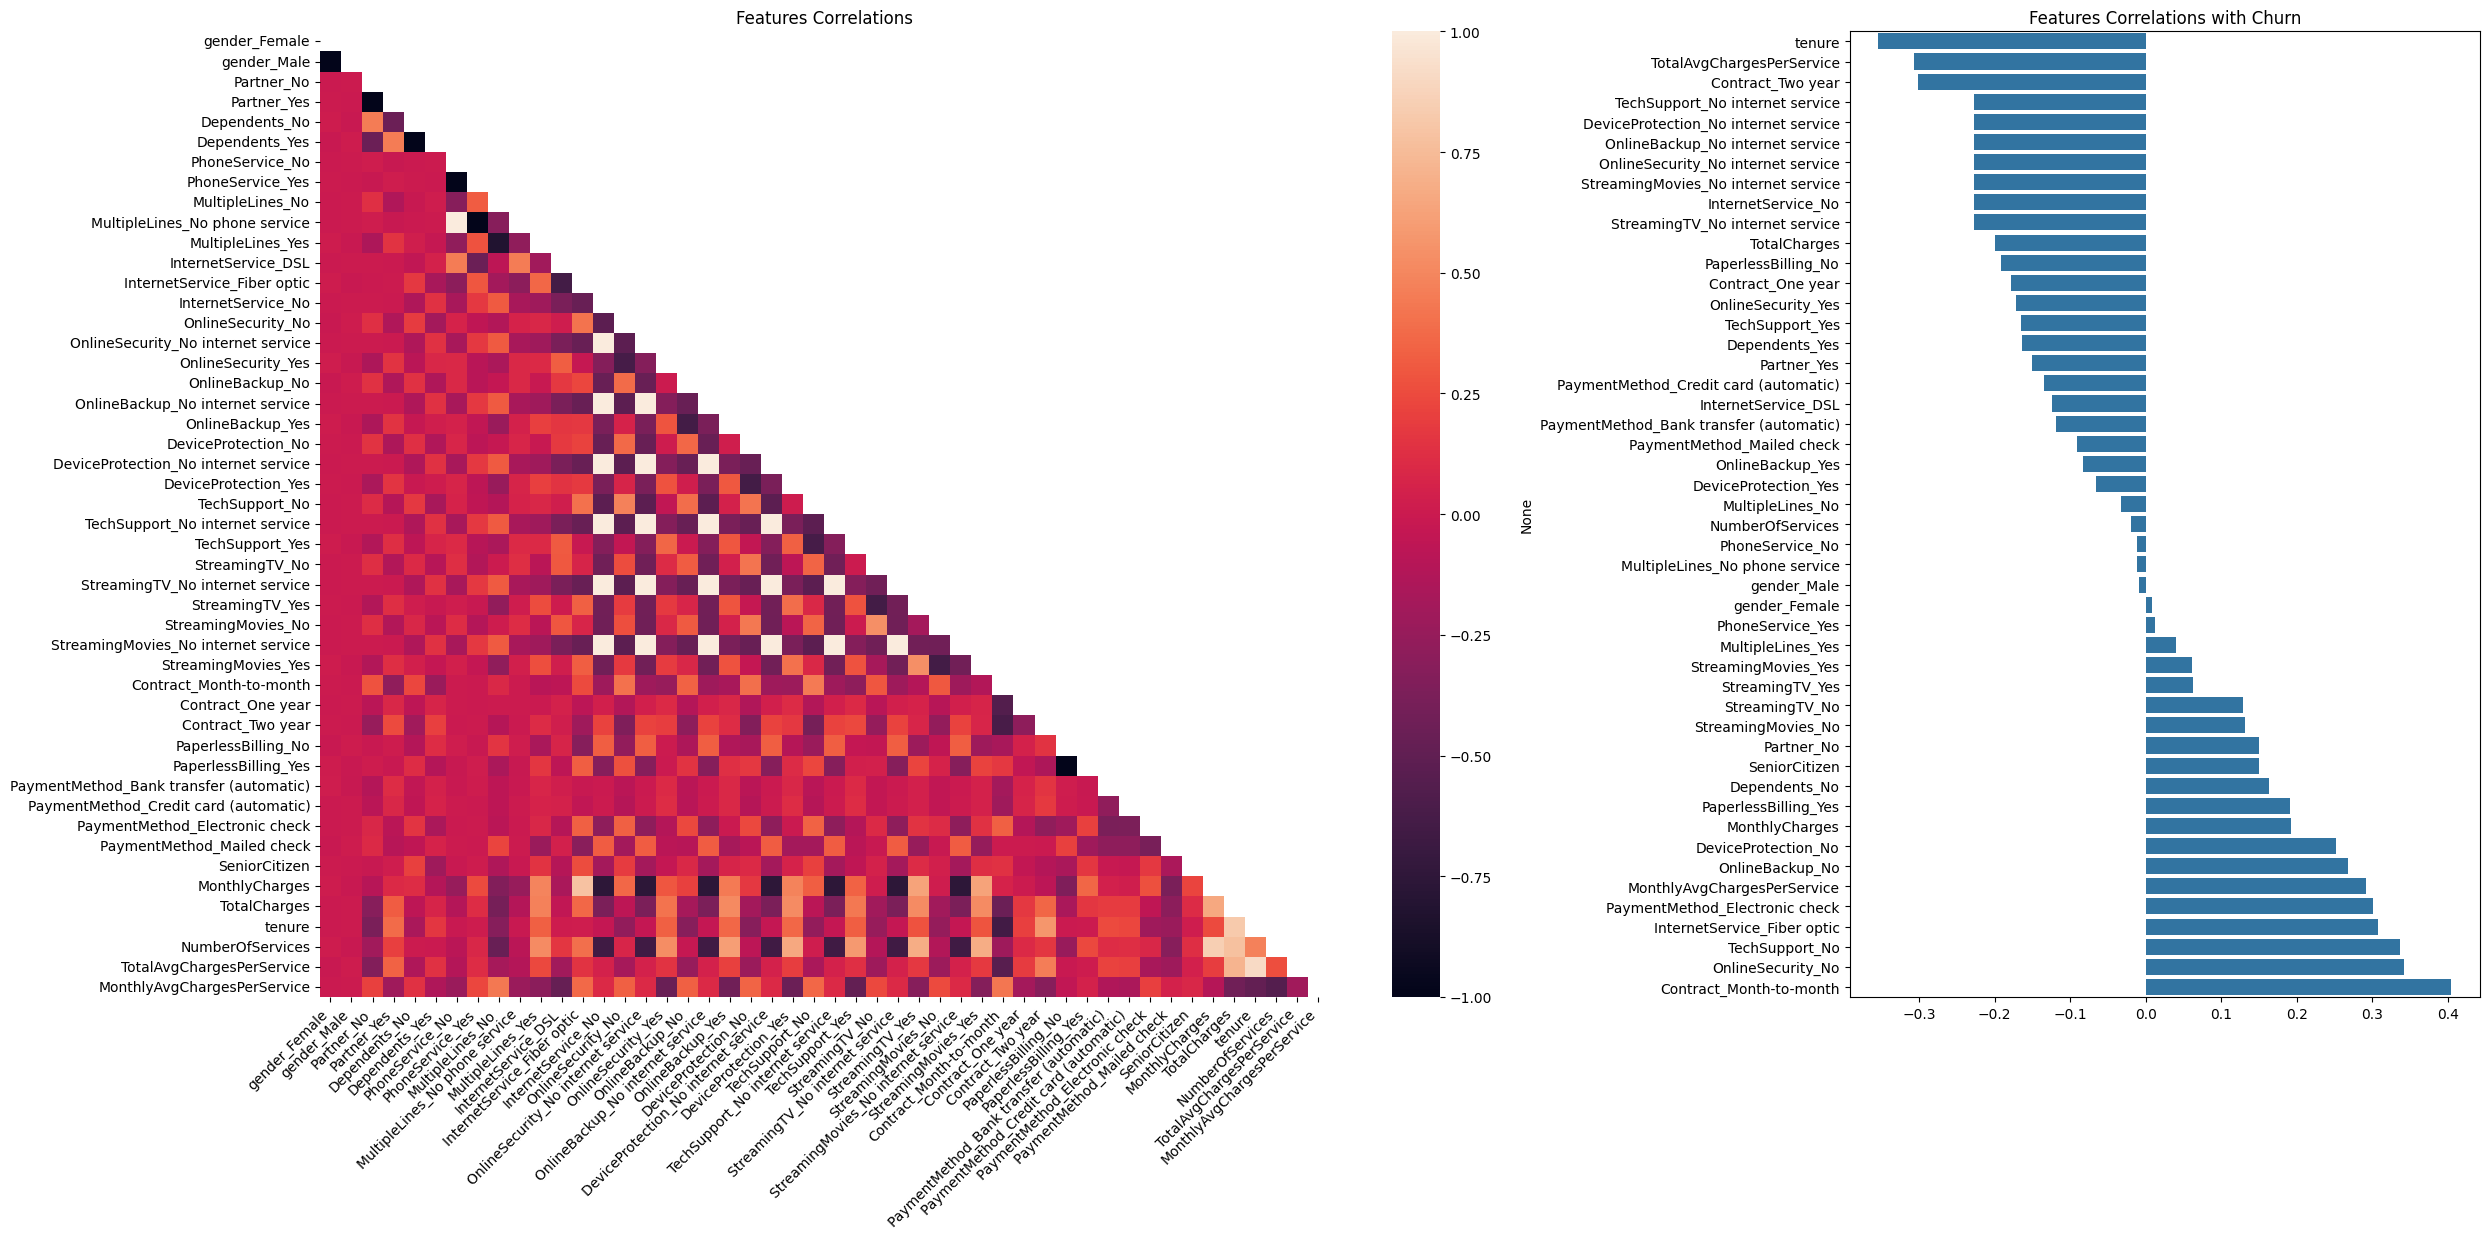

In [48]:
plot_correlations(new_features, figsize=(25, 12.5))

Lets first analyze the left plot. Mostly of the correlation information here is redundant and doesn't bring any additional information, like:
- Features representing the presence/absence of a characteristic and their counterparts. e.g.: `gender_Male` and `gender_Female`, `Dependents_No` and `Dependents_Yes`, `PhoneService_No` and `PhoneService_Yes`, `MultipleLines_No` and `MultipleLines_Yes`.
- Features representing the absence of a service and other services that depend on it. e.g: `InternetService_No` with features `OnlineSecurity_No InternetService`, `OnlineBackup_No Internet Service`, `DeviceProtection_No Internet Service`, etc.
- Features representing the categories of their original features. e.g: `InternetService_No`, `InternetService_DSL` and `InternetService_Fiber optic`.
- The high indirect correlation of `MonthlyCharges` with features representing absence of a service.

With these correlations set aside, we can note some other intersting correlations.
- The relatively high correlation between `InternetService_Fiber optic` and `MonthlyCharges` may indicate that then internet service provided via fiber optic is the most expensive service.
- The positive correlation between `StreamingTV_Yes` and `StreamingMovies_Yes` indicates that the number of customers that have both services is considerable.
- The positive correlation between `tenure` and `NumberOfServices` may indicate that loyal customers tends to have more services than just `InternetService` and `PhoneService`

Now, analyzing the features correlations with Churn (right plot) we can confirm some of the assumptions made in the EDA section:
- Customers with **2-year** or anual contract are likely to stay with the company, while those with **monthly** contracts have higher probabilities of leaving.
- Customers without rech support, onlie security and online backup are more likely to churn than those that have those services.
- Customers without internet service have tends to not churn.
- Customers with partners and/or dependents likely do not churn.
- Customers that have internet service via fiber optic have a high probability of leaving.

# Model Selection

Now it's time to put what we've learned in practice by creating a classification model. This project is suposed to be an incremental one: we'll complete **end-to-end** project, but the final model won't be the best we can do. The final model will improved in the future by exploring other possibilities (e.g.: other models, other features, other pre-processing strategies, etc.).

Although we got to know our data much better now, there's one thing missing to actually start to build our models.

## Evaluation Metric

This is a Kaggle's contributor dataset and, as so, a specific evaluation metric isn't supplied. In a real world company scenario, this evaluationm metrics would be defined by considering the business requirement that the project needs to attend to. For example:
- We could focus our efforts in building a model that better identifies the customer types that are likely to stay with the company's service. So, for example, the company's CRM and Quality Control teams could better plan on how to keep those customer's satisfaction levels high.
- On the other hand, we could also build a model that could accuratly identify customers that are likely to churn. This information could be used to orient the company's campaigns to bring those customer's attention back, increasing their engagement and avoiding contracts losses.

But, well, I don't have a service company (yet =P), so I'll choose the evaluation metrics arbitrally. And, as we're still learning more than applying, I'll orient our efforts to build a model that can give us the best of the two worlds: our model will, hopefully, equally detect customers that are likely churn as good as it can detect customers that are likely to stay.

So, to fully understand our evaluation metric, first we need to get clear what is a **success** and what is a **failure** in our strategy. And nothing is better to understand those concepts than the so called [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix).

### The Confusion Matrix

Imagine that we built a classification model already, and we used it to predict which of a population of customers will churn. Imagine that we already know how many churned, we're evaluating our model's accuracy. For this, we can summarize the numbers of true and predicted labels in a simple $ 2D $ table where the **columns** represents our model's predictions and the **rows** represents the actual class instances (churned or not-churned).

<img src="imgs/confusion_matrix.png" alt="Confusion Matrix" width=30%></img>

- **True Positives:** a.k.a **hit**, is the number of customers that **have actually churned** and were rightly **predicted to churn** by the model.
- **False Positives:** a.k.a **false alarm** or **overestimation**, is the number of customers that **haven't churned** but were wrongly **predicted to churn** byt the model.
- **False Negatives:** a.k.a **miss** or **underestimation**, is the number of customers that **actually churned** but were wrongly **predicted to not churn** by the model.
- **True Negatives:** a.k.a **correct rejection**, is the number of customers that **haven't churned** and were rightly **predicted to not churn** by the model.

With these definitions, we can define two metrics:

- **Precision:** stands for the proportion of **True Positive** (i.e: the customers predicted to churn and have indeed churned) instances w.r.t the whole population size.

$$
Precision = \frac{TruePositives}{NumberOfCustomers}
$$

- **Recall:** a.k.a **sensitivity** ot **true positive rate** (**TPR**), is the proportion of **True Positive** instances w.r.t all population's individuals that **should be predicted as positives** (i.e: all customers that have actually churned).

$$
Recall = \frac{TruePositives}{AllCustomersThatChurned}
$$

Now, we can finally define our evaluation metric.

### F1 Score

The **F1 Score**, a.k.a **F-score** or **F-measure**, can be interpreted as a harmonic mean of the **precision** and **recall**.

$$
F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$

Both **precision** and **recall** have equal relative contribution, and the best score is at 1 (100% of precision and recall) and the worst is at 0.

This metric was chosen due for taking into account not only **how many** customers were rightly predicted, but also the overall **quality** of the predicition, i.e: we want our model as close to reality as possible.

## Random State

One of the most important aspects of any Machine Learning project is the reproductibility of the results. For this, we'll declare a fixed `random_state` to be used by **data selection** and the **models** that we'll create.

In [49]:
random_state = 42

## Train and Validation Sets

We'll also create a train and a validation set. All models that we'll use will be trained using the train set. The validation set will be used to evaluate those models.

First, we split the target feature `Churn` from other features.

In [50]:
X = new_features.drop("Churn", axis="columns").values
y = new_features.Churn.values.squeeze()
X.shape, y.shape

((7032, 48), (7032,))

Then, we extract 20% of the whole dataset to be used as a validation set and the remaining 80% will be used to train our models.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5625, 48), (5625,), (1407, 48), (1407,))

Note that we set the algorithm to stratify on the target variable, by setting the parameter `stratify`. This will ensure that both sets have the same proportion of **customers churn ratio**, so our models won't be trained on a unfair scenario.

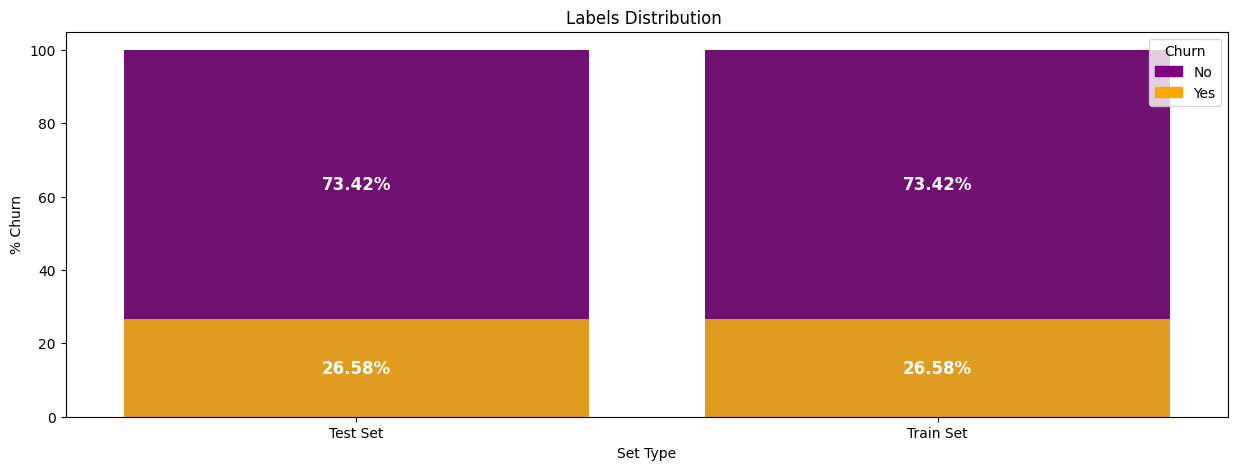

In [52]:
df_train_labels = pd.DataFrame(data={"Churn": churn_transformer.inverse_transform(y_train), "Set": "Train Set"})
df_test_labels = pd.DataFrame(data={"Churn": churn_transformer.inverse_transform(y_test), "Set": "Test Set"})
df_labels = pd.concat((df_train_labels, df_test_labels)).reset_index(drop=True)

_, ax = plt.subplots(figsize=(15, 5))

plot_stacked_percentages_plot(feature="Set", data=df_labels, ax=ax)
ax.set_title("Labels Distribution ")
ax.set_xlabel("Set Type");

## Evaluation Functions

Here we define some functions to help evaluating the performance of the future models.

The first one executes a **[cross-validation procedure](https://scikit-learn.org/stable/modules/cross_validation.html)** of 5-folds for a the supplied model.

<img src="imgs/cross_validation.png" alt="Cross-validation" width=65%></img>

Cross-validation is a simple concept:
1. Split the dataset in $ K $ subsets (a.k.a *folds*).
2. Select one fold to be used as *test fold*.
3. Train a model with the remaining folds.
4. Compute the evaluation score of the model using the *test fold*.
5. Select a different fold as *test fold* and get back to step 3.
6. Repeat until all folds were used as *test folds*.

Usually, the model scoring using cross-validation is computed by averaging the scores of all folds. The following code uses the `StratifiedKFold` class from [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) to ensures that each fold has the same proportions of customer's **churn ratio**.

In [53]:
def cross_validate(model, cv_splits=5, random_state=None):
    kfold = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=random_state)
    results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="f1")
    return results.mean()

We'll also use the concept of **Receiver Operating Characteristic Curve**, or **ROC curve**, to asses the performance of our models. The ROC curve is a graphical representaion of a model's performance w.r.t the possible classification *thresholds* used in the classification decision function.

The horizontal axis represents the **true positive rate** (**TPR**, defined earlier) when the decision threshold varys. The vertical axis represents **false positive rate** (**FPR**) of the model, given by:
$$
FPR = \frac{FalsePositives}{AllCustomersThatNotChurned}
$$

<figure>
    <img src="https://upload.wikimedia.org/wikipedia/commons/1/13/Roc_curve.svg" style="width: 25%">
    <p align="center">Credits: <a href="https://en.wikipedia.org/wiki/Receiver_operating_characteristic">Wikipedia</a></p>
</figure>

In the figure above, we can see that both **TPR** and **FPR** range from 0.0 to 1.0.

The dotted line from 0.0 to 0.1 represents a ROC curve for a purely random classifier (detection probability of 0.5). Note how the proportion of TPR and FPR grow linearly, indicating no improvement at all when the decision threshold vary. Also note the other colored curves. As far the model's ROC curve is from the random classifer's curve, and closer to the point of the perfect classifier represented by the top-left blue dot, the model will be more accurate in it's predictions.

But how can we quantify the model's performance using the ROC curve? For this, we use the **Area Under the Curve** (**AUC**), that, as the name sugests, is the numeric representation of the area under the ROC curve. The higher the AUC is, the better. Setting aside the mathematical operations, Scikit-Learn kindly two useful functions:
- **[roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html):** computes the TPR and FPR points corresponding for all different possible values of the dicision thereshold.
- **[roc_auc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html):** byt suppling the TPR and FPR points, computes the AUC.

the function below make use of these functions to plot the ROC curves of the model's performance in train and validation sets, together with their corresponding AUCs.

In [54]:
def plot_aucs(model, ax=None):
    model_copy = clone(model)
    model_copy.random_state = random_state
    model_copy.fit(X_train, y_train)
    
    def plot_auc(true, scores, color, set_type, ax):
        fpr, tpr, _ = roc_curve(true, scores)
        roc_auc = auc(fpr, tpr)
        
        ax.plot(fpr, tpr, color, lw=2, label=(f"{set_type.capitalize()} ROC curve (AUC = {roc_auc:0.2f})"))
    
    train_scores = model_copy.predict_proba(X_train)[:, 1]
    test_scores = model_copy.predict_proba(X_test)[:, 1]
    
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 7))
    
    plot_auc(y_train, train_scores, color="darkorange", set_type="train", ax=ax)
    plot_auc(y_test, test_scores, color="red", set_type="test", ax=ax)
    
    ax.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    ax.scatter([0], [1])
    ax.annotate("Perfect classifier", (0.01, 1.01), ha="left", va="bottom", color="blue")
    
    ax.set_xlim([-0.03, 1.0])
    ax.set_ylim([0.0, 1.06])
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title(f"{type(model).__name__} Receiver Operating Characteristic")
    ax.legend(loc="lower right")

# Machine Learning

Finally, it's time to build and evaluate some models on the dateset. For this project, our approach will be very simple: at first , we'll train some different models and compute the counts of *True Negatives*, *False Positives*, *False Negatives*, *True Positives* and, additionally, their *F1-score*. These metrics will be presented in a table, to better compare their performances. After that, we'll plot their respective *ROC curves*, so we'll be able to check if they are *overfitted* our *underfitted*, which will help to understand those models. We'll conclude by selecting one of those models, tuning it up and making our final evaluations.

## Evaluate Some Classifiers

For this section, some of the most proeminent approaches for binary classification were chosen:

- **LogisticRegression**
- **Support Vector Machines** (with either **linear** and **radial-basis function** kernels)
- **Random Forest**
- **XGBoost**
- **LightGBM**

We'll train those models on the train set using their default parameters, make predictions using the validation set and compute their confusion matrices. We'll also cross-validate the models to compute their averaged *F1-score*.

In [55]:
def compute_classification_stats(model):
    model_clone = clone(model)
    model_clone.fit(X_train, y_train)
    predictions = model_clone.predict(X_test)
    score = cross_validate(model, cv_splits=8, random_state=random_state)
    return [score] + confusion_matrix(y_test, predictions).flatten().tolist()

In [56]:
models = [
    LogisticRegression(max_iter=500),
    LinearSVC(),
    SVC(),
    RandomForestClassifier(),
    XGBClassifier(eval_metric="logloss", use_label_encoder=False, max_depth=3),
    LGBMClassifier()
]

In [57]:
data = [compute_classification_stats(model) for model in models]

classifiers_stats = pd.DataFrame(data=data, columns=["Mean F1 Score", "True Negative", "False Positive", "False Negative", "True Positive"])
classifiers_stats.index = ["Logistic Regression", "Linear SVM", "RBF SVM", "Random Forest", "XGBoost", "LightGBM"]
classifiers_stats.sort_values("Mean F1 Score", ascending=False)

[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1185
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
[LightGBM] [Info] Number of positive: 1308, number of negative: 3613
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1185
[LightGBM] [Info] Number of data points in the train set: 4921, number of used features: 48
[LightGBM] [Info] [binar

,Mean F1 Score,True Negative,False Positive,False Negative,True Positive
Logistic Regression,0.592798,920,113,170,204
Linear SVM,0.587010,927,106,182,192
LightGBM,0.584294,910,123,177,197
XGBoost,0.580445,904,129,177,197
RBF SVM,0.569779,920,113,184,190
Random Forest,0.560237,927,106,190,184


By analysing this table we can make some assumptions:
- It seems that a simple Logist Regression based model is sufficiently good to predict which customers will churn.
- Linear SVM and LightGBM base models have almost the same *F1-score*, with the first one having a slighly better performance in detecting customers that will churn and a significant better performance in rejecting the ones that won't.
- LightGBM ad XGBoost have prrety much the same performance. The discrepancy in their *F1-scores* must be due to some variations in cross-validation folds.

Now we'll plot the *ROC curves* for some of those models to check which ones could be tuned for better performance by reducing *overfitting*/*uderfitting*. Note that not all of the modelscan be validated using this approach right away: **Support Vector Machine** based models doesn't rely on a probabilist decision function which is the core of the *ROC curve* computation.

[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1185
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151


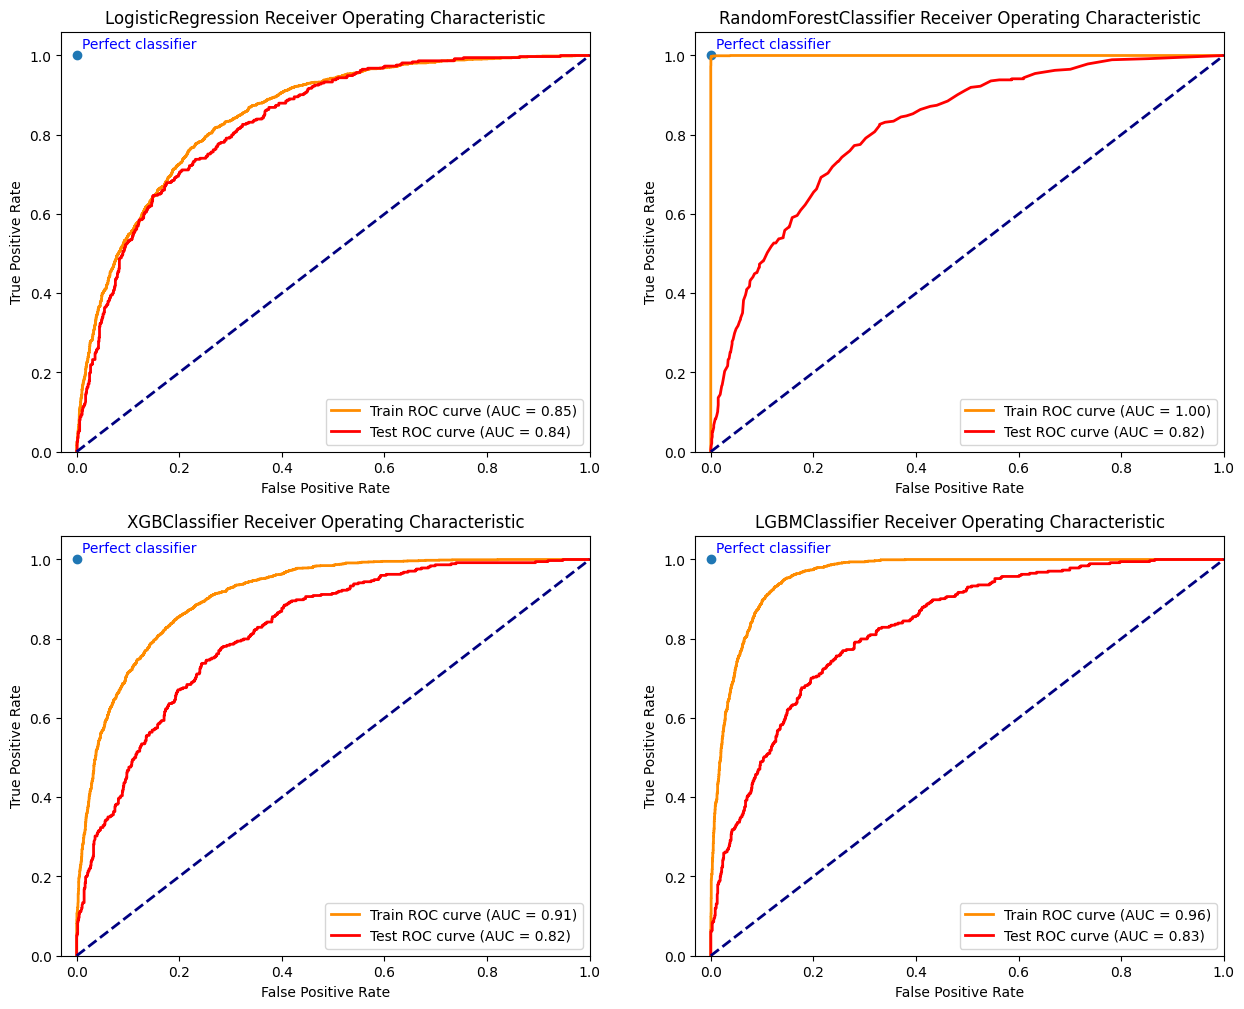

In [58]:
models_with_scores = [model for model in models if getattr(model, "predict_proba", None) is not None]

_, axs = plt.subplots(nrows=int(np.ceil(len(models_with_scores) / 2)), ncols=2, figsize=(15, 12))
axs = (ax for axs_list in axs for ax in axs_list)
for ax, model in zip(axs, models_with_scores):
    plot_aucs(model, ax=ax)

There are some interesting stuff here:
- The Linear Regression based model (our best model so far) does really well in both train and test data.
- The other models are all tree-based. These methods are very versatile, not only for classification problems. But the bigest problem is that they are prone to *overfitting*. This is what is exactly happening.
- Specifically, the simple Random Forest model is perfectly fitted to the train data (the curve is virtually touching the point of the best classifier), which is reflected on the lowest AUC for the test set.
- The LightGBM model has the best balence of train and test sets AUCs.

## Grid Search

Now let's check if we can tweak some of these models to improve their performance. For this, we'll use a technique called *Grid Search*: we define an estimator and a parameter space, and for each parameter combination we compute a *cross-validation* score for it's corresponding model. The search is exhaustive: every possible combination of parameters will be used.

For this task, we'll use the Scikit-Learn's `GridSearchCV` class. Note that the **estimator** can be anything that implements the Scikit-Learn estimator interface, including *pipelines*. In the code block below, we first declare a pipeline with only one layer, named `classifier`. By doing this we effectively turn the `classifier` into a **parameter**.

Next, we define our *parameter grid*, composed of a series of dictionaries. Note that every dict has the **classifier** key, matching the **classifier** parameter of our pipeline. The other parameters in each dictionary follows the same pattern: the key is a string starting with `classifier__`, marking them as **subparameters** of the parameter `classifier`, so they'll be supplied to their corresponding **classifier** during the cross-validation. So, instead of just choosing the best combination for a model, we are choosing both the combination **and** the model itself.

Finally, we create a `GridSearchCV` instance using our parameter grid and the pipeline as **estimator**, and *fit* the hole thing on the train set.

**Note:** As this is an exhaustive search, the fit time and resource usage will depend on the number of possible **combinations of the supplied parameters**. So, if want to experiment using this technique, be careful to choose the number of testing paremeters that best fit your project deadline and resources limitations. Here, as we're just doing some experimentations and using this technique for illustration purposes, I've chosen just a few possibilities.

In [59]:
pipe = Pipeline([("classifier", RandomForestClassifier())])

param_grid = [
    {
        "classifier": [LogisticRegression()],
        "classifier__penalty": ["l1", "l2"],
        "classifier__C": np.logspace(-4, 4, 20),
        "classifier__solver": ["liblinear"],
        "classifier__max_iter": [500]
    },
    {
        "classifier": [XGBClassifier()],
        "classifier__eval_metric": ["logloss"],
        "classifier__use_label_encoder": [False],
        "classifier__n_estimators": list(range(100, 501, 100)),
        "classifier__max_depth": [3, 4, 5]
    },
    {
        "classifier": [LGBMClassifier(verbose=-1)],
        "classifier__n_estimators": list(range(100, 501, 100)),
        "classifier__num_leaves": list(range(12, 24, 5)),
        "classifier__max_depth": [-1, 3, 4]
    }
]

clfs = GridSearchCV(pipe, param_grid=param_grid, cv=5, verbose=True, n_jobs=1)
best_model = clfs.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


After the fitting is finished, we can access the best found parameter through the `best_estimator_` attribute, and, as the estimator is a pipeline with only one layer, we access the `classifier` layer to retrieve the model itself.

In [60]:
best_estimator = best_model.best_estimator_.steps[0][1]
best_estimator

LogisticRegression(C=1438.44988828766, max_iter=500, penalty='l1',
                   solver='liblinear')

The bewst estimator found is an instance of the `LGBMClassifier`. We can access the complete set of it's training parameters by calling it's `get_param` method.

In [61]:
best_estimator.get_params()

{'C': 1438.44988828766,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Now we can evaluate it's performance.

In [62]:
compute_classification_stats(best_estimator)

[0.5937320000027422, 913, 120, 168, 206]

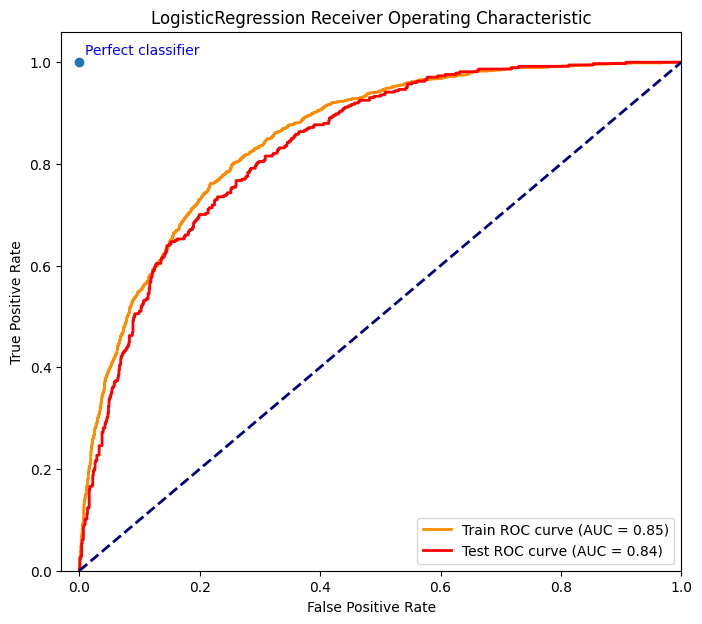

In [63]:
plot_aucs(best_estimator)

Surprisingly, the found model seems to be just a bit better on average than the LogisticRegression.

# Training the Model Pipeline

With the model and it's best parameters found, it's time to train on the whole dataset. For this we'll again create a pipeline, which will enable us to pre-process, do feature engineering and train our final model, all in one shot.

In [64]:
model_pipeline = make_pipeline(
    NewFeaturesAdder(),
    make_column_transformer(
        (OneHotEncoder(sparse_output=False), categorical_features),
        (MinMaxScaler(feature_range=(0.0, 1.0)), numerical_features)
    ),
    LGBMClassifier(**best_model.best_estimator_.steps[0][1].get_params())
)
model_pipeline

Pipeline(steps=[('newfeaturesadder', NewFeaturesAdder()),
                ('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract'...
                                                  ['SeniorCitizen',
                                                   'MonthlyCharges',
                                                   'TotalCharges', 'tenure',
                                                   'NumberOfServices',
                                                   'TotalAvgChargesPerService',
                                                   'MonthlyAvgChargesPerService'])])),
                ('lgbmclassifier',
                 LGBMClassifier(C=1438.44988828766, dual=False,
                                fit_intercept=True, intercept_scaling=1,
                                l1_ratio=None, max_iter=500, multi_class='auto',
                                penalty='l1', solver='liblinear', tol=0.0001,
                                verbose=0, warm_start=False))])

Note the advantages of using pipeline obejects: the previously defined `NewFeaturesAdder` pipeline is used here as a simple tranformer object, and it is used inside our `model_pipeline`, which is in turn used as a simple estimator.

Now all we have to do is to fit the estimator on the whole (original/unprocessed) dataset.

In [65]:
target = churn_transformer.transform(customer_churn.Churn)
model_pipeline.fit(customer_churn, target)

[LightGBM] [Warning] Unknown parameter: fit_intercept
[LightGBM] [Warning] Unknown parameter: intercept_scaling
[LightGBM] [Warning] Unknown parameter: warm_start
[LightGBM] [Warning] Unknown parameter: tol
[LightGBM] [Warning] Unknown parameter: penalty
[LightGBM] [Warning] Unknown parameter: multi_class
[LightGBM] [Warning] Unknown parameter: dual
[LightGBM] [Warning] Unknown parameter: solver
[LightGBM] [Warning] Unknown parameter: C
[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: fit_intercept
[LightGBM] [Warning] Unknown parameter: intercept_scaling
[LightGBM] [Warning] Unknown parameter: warm_start
[LightGBM] [Warning] Unknown parameter: tol
[LightGBM] [Warning] Unknown parameter: penalty
[LightGBM] [Warning] Unknown parameter: multi_class
[LightGBM] [Warning] Unknown parameter: dual
[LightGBM] [Warning] Unknown parameter: solver
[LightGBM] [Warning] Unknown parameter: C


Pipeline(steps=[('newfeaturesadder', NewFeaturesAdder()),
                ('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract'...
                                                  ['SeniorCitizen',
                                                   'MonthlyCharges',
                                                   'TotalCharges', 'tenure',
                                                   'NumberOfServices',
                                                   'TotalAvgChargesPerService',
                                                   'MonthlyAvgChargesPerService'])])),
                ('lgbmclassifier',
                 LGBMClassifier(C=1438.44988828766, dual=False,
                                fit_intercept=True, intercept_scaling=1,
                                l1_ratio=None, max_iter=500, multi_class='auto',
                                penalty='l1', solver='liblinear', tol=0.0001,
                                verbose=0, warm_start=False))])

Finally, we'll evaluate the newly created model. Once again, note how easy it is: we just need to call `predict` on the whole (orignal/unprocessed) dataset.

In [66]:
final_predictions = model_pipeline.predict(customer_churn)
final_predictions

[LightGBM] [Warning] Unknown parameter: fit_intercept
[LightGBM] [Warning] Unknown parameter: intercept_scaling
[LightGBM] [Warning] Unknown parameter: warm_start
[LightGBM] [Warning] Unknown parameter: tol
[LightGBM] [Warning] Unknown parameter: penalty
[LightGBM] [Warning] Unknown parameter: multi_class
[LightGBM] [Warning] Unknown parameter: dual
[LightGBM] [Warning] Unknown parameter: solver
[LightGBM] [Warning] Unknown parameter: C


array([0, 0, 1, ..., 0, 1, 0])

In [67]:
final_model_score = cross_val_score(
    clone(model_pipeline),
    customer_churn,
    y,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state),
    scoring="f1"
).mean()

final_model_data = [final_model_score] + confusion_matrix(y, final_predictions).flatten().tolist()

final_model_stats = pd.DataFrame(data=[final_model_data], columns=["Mean F1 Score", "True Negative", "False Positive", "False Negative", "True Positive"])
final_model_stats.index = ["LightGBM"]
final_model_stats.sort_values("Mean F1 Score", ascending=False)

[LightGBM] [Warning] Unknown parameter: fit_intercept
[LightGBM] [Warning] Unknown parameter: intercept_scaling
[LightGBM] [Warning] Unknown parameter: warm_start
[LightGBM] [Warning] Unknown parameter: tol
[LightGBM] [Warning] Unknown parameter: penalty
[LightGBM] [Warning] Unknown parameter: multi_class
[LightGBM] [Warning] Unknown parameter: dual
[LightGBM] [Warning] Unknown parameter: solver
[LightGBM] [Warning] Unknown parameter: C
[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: fit_intercept
[LightGBM] [Warning] Unknown parameter: intercept_scaling
[LightGBM] [Warning] Unknown parameter: warm_start
[LightGBM] [Warning] Unknown parameter: tol
[LightGBM] [Warning] Unknown parameter: penalty
[LightGBM] [Warning] Unknown parameter: multi_class
[LightGBM] [Warning] Unknown parameter: dual
[LightGBM] [Warning] Unknown parameter: solver
[LightGBM] [Warning] Unknown parameter: C
[Light

,Mean F1 Score,True Negative,False Positive,False Negative,True Positive
LightGBM,0.544511,5084,79,45,1824


We've got a average F1-score of 0.5892. We can also plot the final model's ROC curve.

[LightGBM] [Warning] Unknown parameter: fit_intercept
[LightGBM] [Warning] Unknown parameter: intercept_scaling
[LightGBM] [Warning] Unknown parameter: warm_start
[LightGBM] [Warning] Unknown parameter: tol
[LightGBM] [Warning] Unknown parameter: penalty
[LightGBM] [Warning] Unknown parameter: multi_class
[LightGBM] [Warning] Unknown parameter: dual
[LightGBM] [Warning] Unknown parameter: solver
[LightGBM] [Warning] Unknown parameter: C


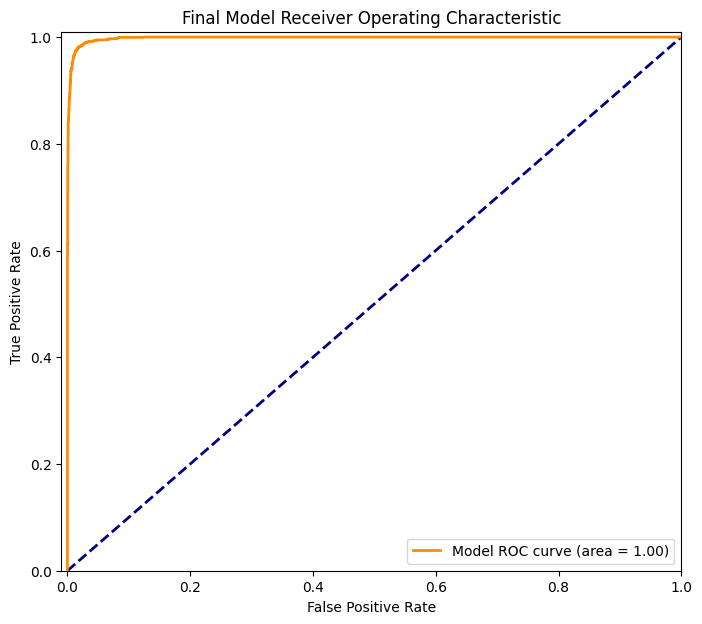

In [68]:
final_scores = model_pipeline.predict_proba(customer_churn)[:, 1]

fpr, tpr, _ = roc_curve(target, final_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 7))
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")

plt.plot(fpr, tpr, "darkorange", lw=2, label=(f"Model ROC curve (area = {roc_auc:0.2f})"))

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Final Model Receiver Operating Characteristic")
plt.legend(loc="lower right");

# Conclusion

In this sample project we applied our data analysis and machine learning skills to work through the basic steps of a machine learning project:
- We made a data analysis on the dataset features, looking for relevant information and insights.
- We created new features based on existing information that can enhance our models' prediction power.
- We trained some models using the most common machine learning approaches and evaluated their performance.
- We've gone through parameter searching process to select the best model.
- we created a full pipeline model, that could be easily extended and deployed.